In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import graphics
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('churn_clean.csv')
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df.duplicated().sum()

0

In [5]:
for col in ['CaseOrder', 'Customer_id', 'Interaction', 'UID']:
    print(col, df[col].nunique())

CaseOrder 10000
Customer_id 10000
Interaction 10000
UID 10000


In [6]:
df['City'].nunique()

6058

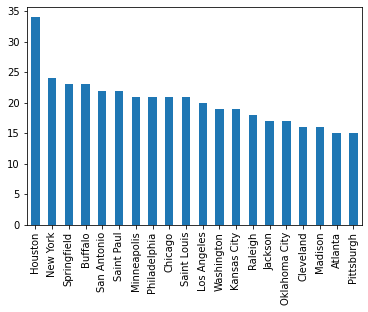

In [7]:
df['City'].value_counts()[:20].plot(kind='bar')
plt.show()

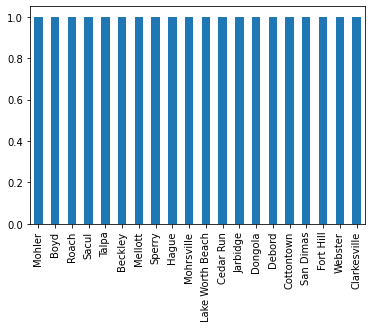

In [8]:
df['City'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [9]:
df['State'].nunique()

52

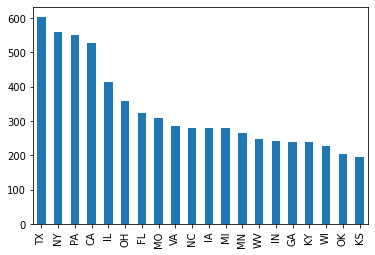

In [10]:
df['State'].value_counts()[:20].plot(kind='bar')
plt.show()

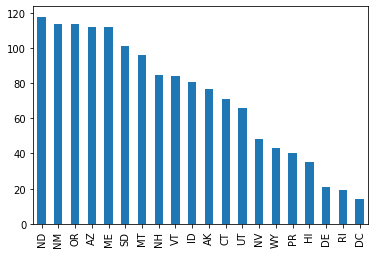

In [11]:
df['State'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [12]:
df['County'].nunique()

1620

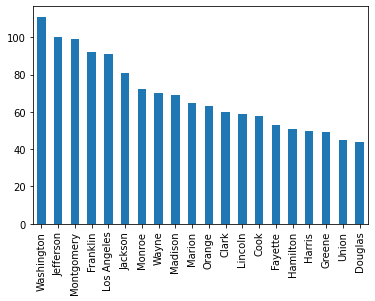

In [13]:
df['County'].value_counts()[:20].plot(kind='bar')
plt.show()

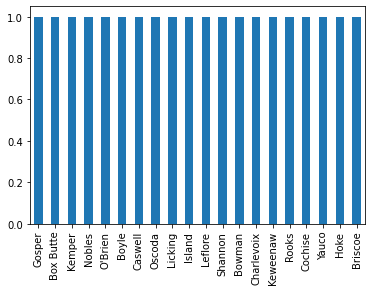

In [14]:
df['County'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [15]:
df['Zip'].nunique()

8583

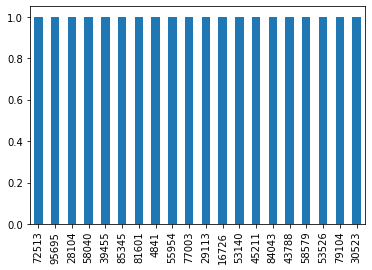

In [16]:
df['Zip'].value_counts()[-20:].plot(kind='bar')
plt.show()

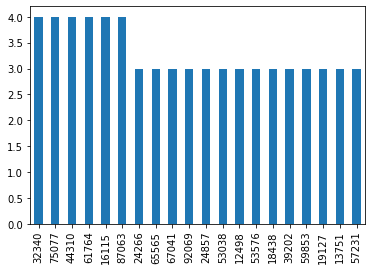

In [17]:
df['Zip'].value_counts()[:20].plot(kind='bar')
plt.show()

In [18]:
df['Zip_Categorical'] = df['Zip'].astype('category')

In [19]:
df['Lat'].describe()

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64

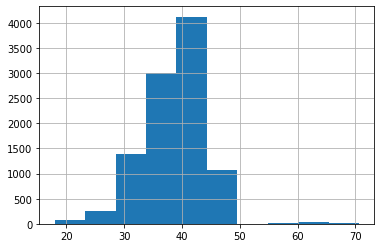

In [20]:
df['Lat'].hist()
plt.show()

In [21]:
df['Lng'].describe()

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64

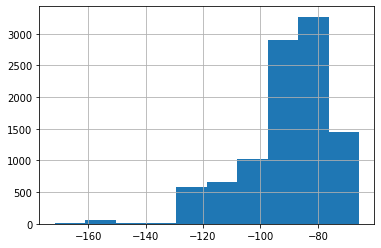

In [22]:
df['Lng'].hist()
plt.show()

In [23]:
df['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

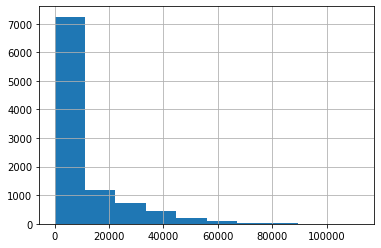

In [24]:
df['Population'].hist()
plt.show()

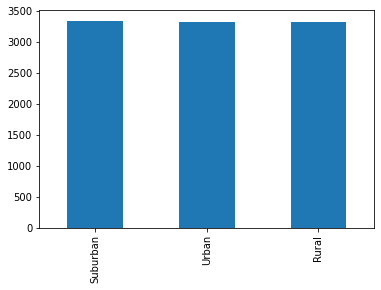

In [25]:
df['Area'].value_counts().plot(kind='bar')
plt.show()

In [26]:
df['Area'].value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [27]:
df['TimeZone'].nunique()

25

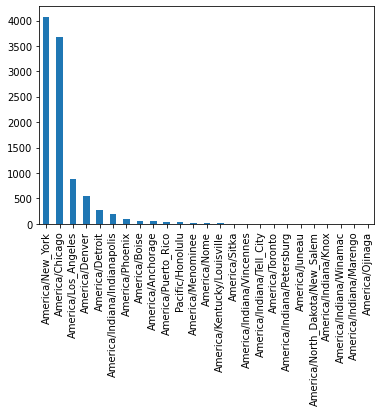

In [28]:
df['TimeZone'].value_counts().plot(kind='bar')
plt.show()

In [29]:
df['TimeZone'].value_counts()

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: TimeZone, dtype: in

In [30]:
df['Job'].nunique()

639

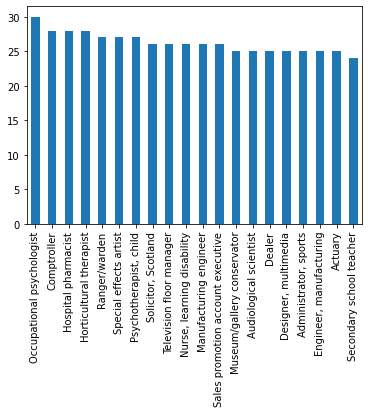

In [31]:
df['Job'].value_counts()[:20].plot(kind='bar')
plt.show()

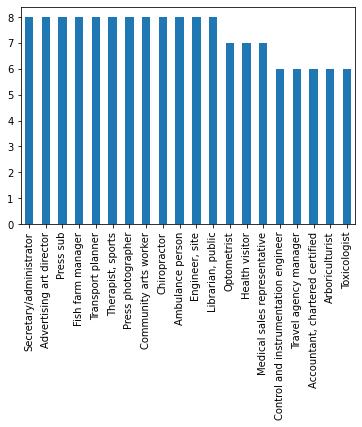

In [32]:
df['Job'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [33]:
df['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

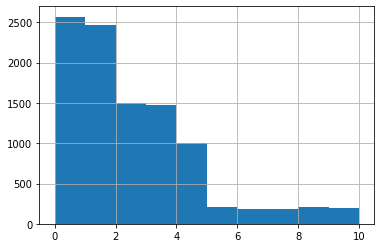

In [34]:
df['Children'].hist()
plt.show()

In [35]:
df['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

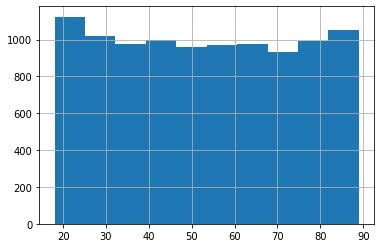

In [36]:
df['Age'].hist()
plt.show()

In [37]:
df['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

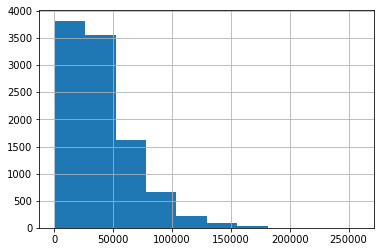

In [38]:
df['Income'].hist()
plt.show()

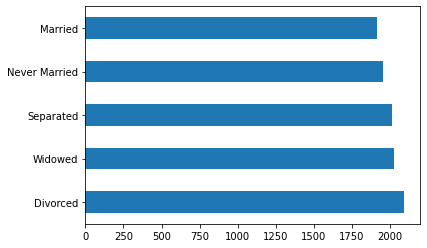

In [39]:
df['Marital'].value_counts().plot(kind='barh')
plt.show()

In [40]:
df['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

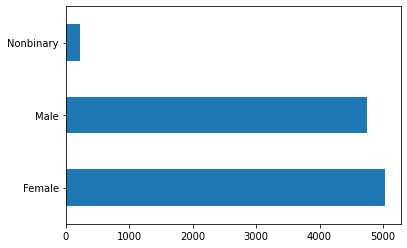

In [41]:
df['Gender'].value_counts().plot(kind='barh')
plt.show()

In [42]:
df['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

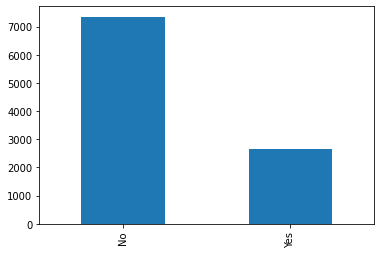

In [43]:
df['Churn'].value_counts().plot(kind='bar')
plt.show()

In [44]:
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

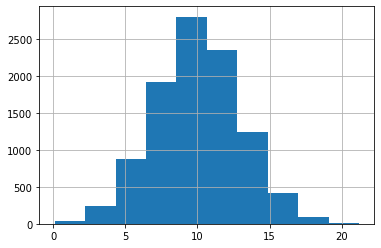

In [45]:
df['Outage_sec_perweek'].hist()
plt.show()

In [46]:
df['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

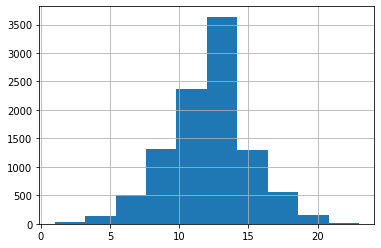

In [47]:
df['Email'].hist()
plt.show()

In [48]:
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

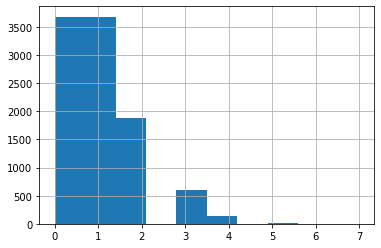

In [49]:
df['Contacts'].hist()
plt.show()

In [50]:
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

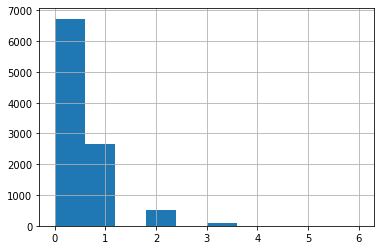

In [51]:
df['Yearly_equip_failure'].hist()
plt.show()

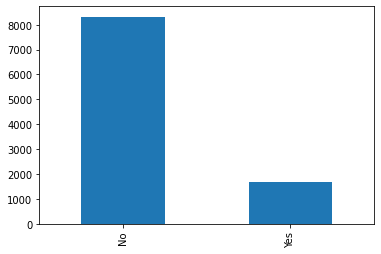

In [52]:
df['Techie'].value_counts().plot(kind='bar')
plt.show()

In [53]:
df['Techie'].value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

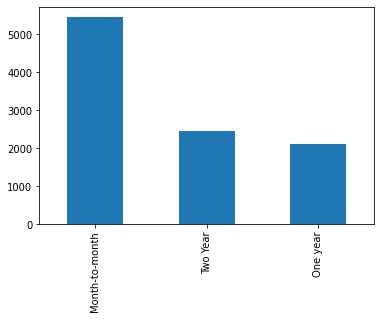

In [54]:
df['Contract'].value_counts().plot(kind='bar')
plt.show()

In [55]:
df['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

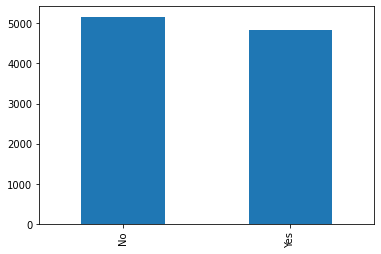

In [56]:
df['Port_modem'].value_counts().plot(kind='bar')
plt.show()

In [57]:
df['Port_modem'].value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

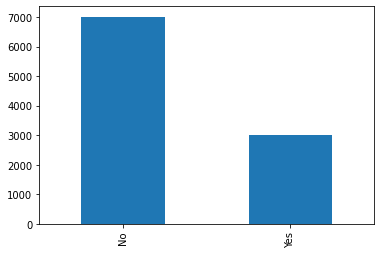

In [58]:
df['Tablet'].value_counts().plot(kind='bar')
plt.show()

In [59]:
df['Tablet'].value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

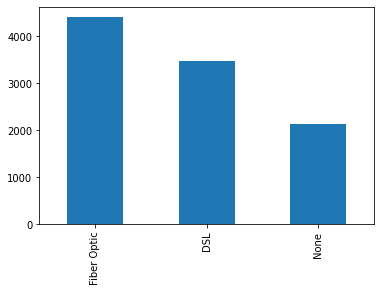

In [60]:
df['InternetService'].value_counts().plot(kind='bar')
plt.show()

In [61]:
df['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

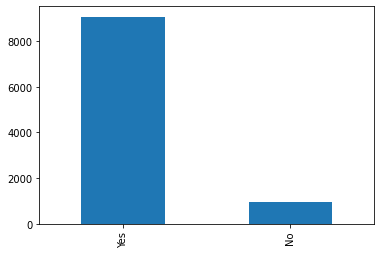

In [62]:
df['Phone'].value_counts().plot(kind='bar')
plt.show()

In [63]:
df['Phone'].value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

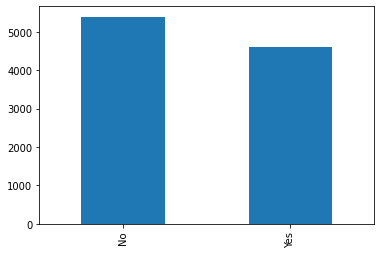

In [64]:
df['Multiple'].value_counts().plot(kind='bar')
plt.show()

In [65]:
df['Multiple'].value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

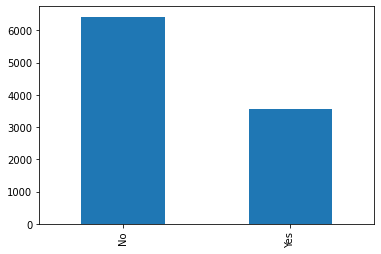

In [66]:
df['OnlineSecurity'].value_counts().plot(kind='bar')
plt.show()

In [67]:
df['OnlineSecurity'].value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

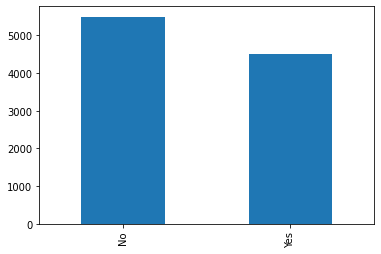

In [68]:
df['OnlineBackup'].value_counts().plot(kind='bar')
plt.show()

In [69]:
df['OnlineBackup'].value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

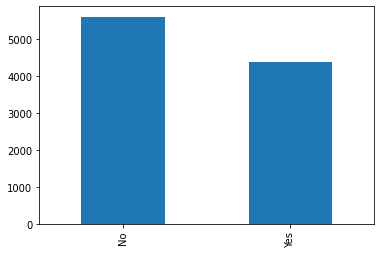

In [70]:
df['DeviceProtection'].value_counts().plot(kind='bar')
plt.show()

In [71]:
df['DeviceProtection'].value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

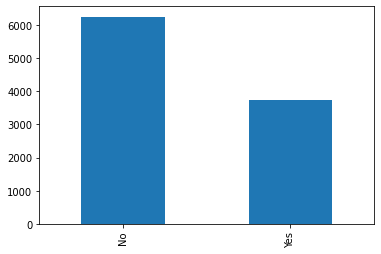

In [72]:
df['TechSupport'].value_counts().plot(kind='bar')
plt.show()

In [73]:
df['TechSupport'].value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

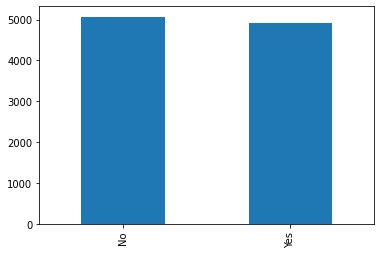

In [74]:
df['StreamingTV'].value_counts().plot(kind='bar')
plt.show()

In [75]:
df['StreamingTV'].value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

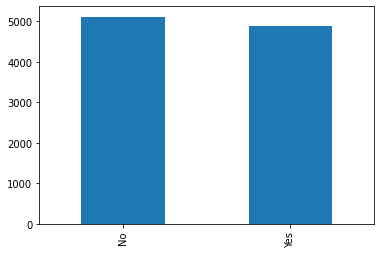

In [76]:
df['StreamingMovies'].value_counts().plot(kind='bar')
plt.show()

In [77]:
df['StreamingMovies'].value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

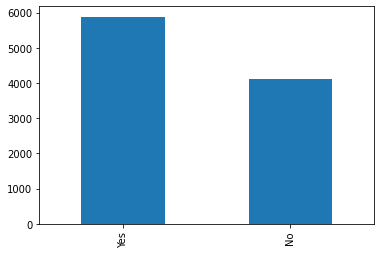

In [78]:
df['PaperlessBilling'].value_counts().plot(kind='bar')
plt.show()

In [79]:
df['PaperlessBilling'].value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

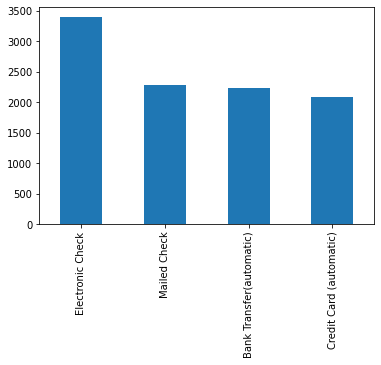

In [80]:
df['PaymentMethod'].value_counts().plot(kind='bar')
plt.show()

In [81]:
df['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [82]:
df['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

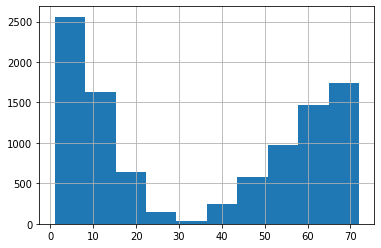

In [83]:
df['Tenure'].hist()
plt.show()

In [84]:
df['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

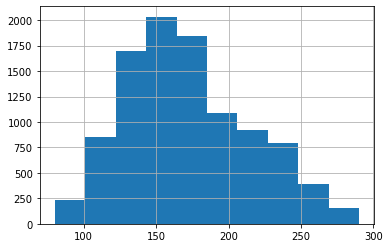

In [85]:
df['MonthlyCharge'].hist()
plt.show()

In [86]:
df['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

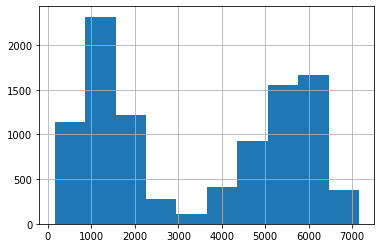

In [87]:
df['Bandwidth_GB_Year'].hist()
plt.show()

In [88]:
df['Item1'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item1, dtype: float64

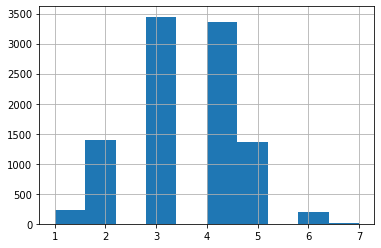

In [89]:
df['Item1'].hist()
plt.show()

In [90]:
df['Item2'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64

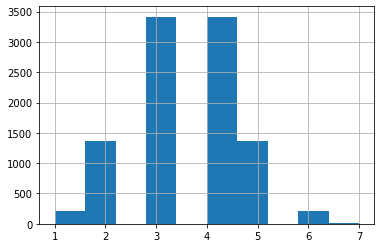

In [91]:
df['Item2'].hist()
plt.show()

In [92]:
df['Item3'].describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item3, dtype: float64

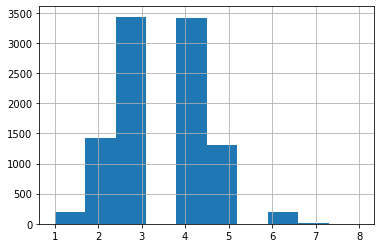

In [93]:
df['Item3'].hist()
plt.show()

In [94]:
df['Item4'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item4, dtype: float64

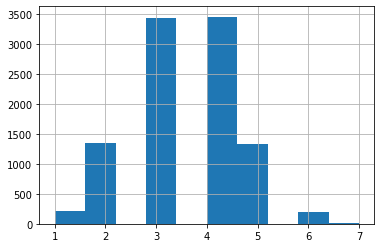

In [95]:
df['Item4'].hist()
plt.show()

In [96]:
df['Item5'].describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item5, dtype: float64

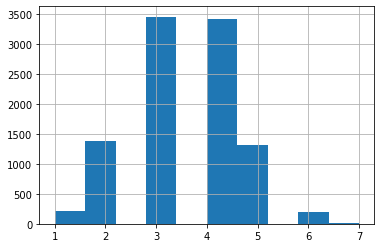

In [97]:
df['Item5'].hist()
plt.show()

In [98]:
df['Item6'].describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item6, dtype: float64

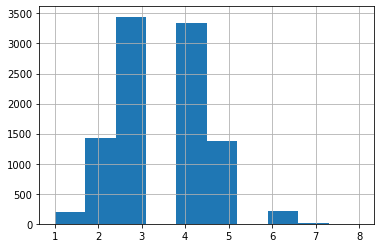

In [99]:
df['Item6'].hist()
plt.show()

In [100]:
df['Item7'].describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item7, dtype: float64

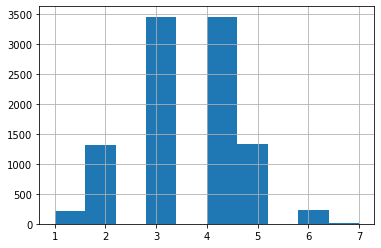

In [101]:
df['Item7'].hist()
plt.show()

In [102]:
df['Item8'].describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item8, dtype: float64

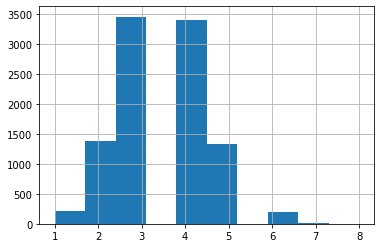

In [103]:
df['Item8'].hist()
plt.show()

In [104]:
data = df.copy()
data.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  Bandwidth_GB_Year Item1 Item2 Item3  \
0  99927  56.25100 -133.37571  ...         904.536110     5     5     5   
1  48661  44.32893  -84.24080  ...         800.982766     3     4     3   
2  97148  45.35589 -123.24657  ...        2054.706961     4     4     2   
3  92014  32.96687 -117.24798  ...        2164.579412     4     4     4   
4  77461  29.38012  -95.80673  ...         271.493436     4     4     4   

   Item4  Item5  Item6 Item7 Item8 Zip_Categorical  
0      3      4      4     3     4           99927  
1      3      4      3     4     4           48661  
2      4      4      3     3     3           97148  
3      2      5      4     3     3           92014  
4      3      4      4     4     5           77461  

[5 rows x 51 columns]

In [105]:
data['Population_Log'] = np.log1p(data['Population'])

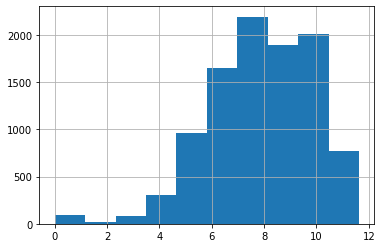

In [106]:
data['Population_Log'].hist()
plt.show()

In [107]:
data['Children_Log'] = np.log1p(data['Children'])

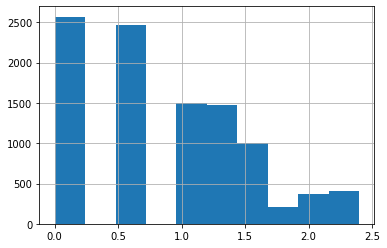

In [108]:
data['Children_Log'].hist()
plt.show()

In [109]:
data['Age_Log'] = np.log(data['Age'])

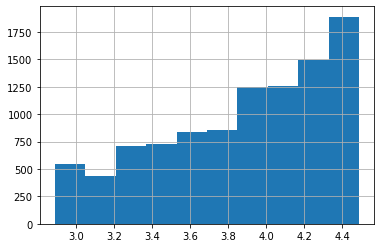

In [110]:
data['Age_Log'].hist()
plt.show()

In [111]:
data['Income_Log'] = np.log(data['Income'])

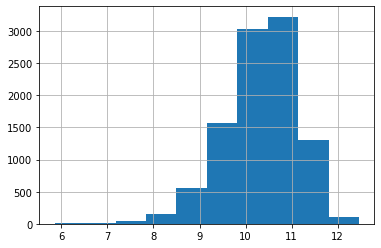

In [112]:
data['Income_Log'].hist()
plt.show()

In [113]:
data['Email_Log'] = np.log(data['Email'])

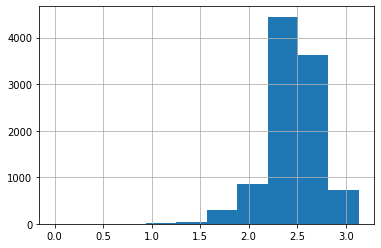

In [114]:
data['Email_Log'].hist()
plt.show()

In [115]:
data['Contacts_Log'] = np.log1p(data['Contacts'])

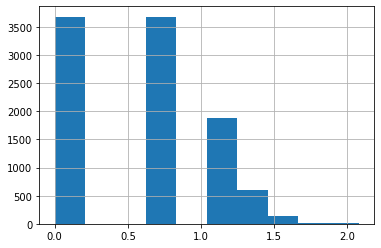

In [116]:
data['Contacts_Log'].hist()
plt.show()

In [117]:
data['Yearly_equip_failure_log'] = np.log1p(data['Yearly_equip_failure'])

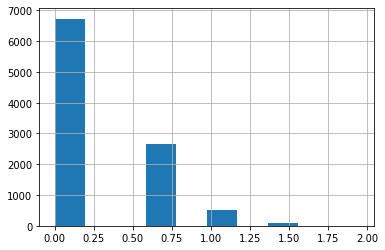

In [118]:
data['Yearly_equip_failure_log'].hist()
plt.show()

In [119]:
contract_mapping = {'Month-to-month': 1, 'One year': 2, 'Two Year': 3}

data['Contract_Ordinal'] = data['Contract'].map(contract_mapping)

In [120]:
data['Tenure_Log'] = np.log(data['Tenure'])

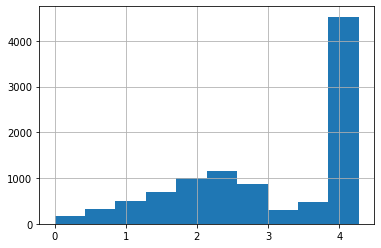

In [121]:
data['Tenure_Log'].hist()
plt.show()

In [122]:
data['Bandwidth_Log'] = np.log1p(data['Bandwidth_GB_Year'])

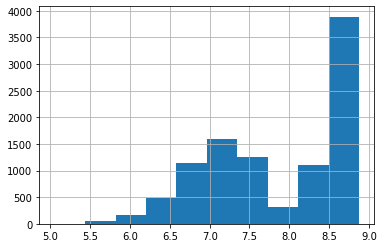

In [123]:
data['Bandwidth_Log'].hist()
plt.show()

In [124]:
data.shape

(10000, 61)

In [125]:
data = data.drop(columns=['Email_Log', 'Age_Log', 'Children_Log'], axis=1)
data.shape

(10000, 58)

In [126]:
region_mapping = {'AK': 'Alaska', 'MI': 'Great_Lakes', 'OR': 'West_Coast', 'CA': 'West_Coast', 
                 'TX': 'Southwest', 'GA': 'Southeast', 'TN': 'Southeast', 'OK': 'Southwest', 'FL': 'Southeast',
                 'OH': 'ORV', 'IA': 'Midwest', 'IL': 'Great_Lakes', 'WI': 'Great_Lakes', 'NC': 'Southeast',
                 'AL': 'Southeast', 'NM': 'Southwest', 'VT': 'Northeast', 'MD': 'Northeast', 'NY': 'Northeast',
                 'WA': 'West_Coast', 'CT': 'Northeast', 'NJ': 'Northeast', 'DC': 'Northeast', 'ND': 'Midwest',
                 'LA': 'Southeast', 'NE': 'Midwest', 'WV': 'ORV', 'AZ': 'Southwest', 'MO': 'Midwest', 
                 'WY': 'Midwest', 'MT': 'Midwest', 'VA': 'Southeast', 'KY': 'ORV', 'MN': 'Great_Lakes',
                 'KS': 'Midwest', 'MA': 'Northeast', 'IN': 'Midwest', 'SC': 'Southeast', 'NH': 'Northeast',
                 'DE': 'Northeast', 'MS': 'Southeast', 'ID': 'Western', 'AR': 'Southeast', 'SD': 'Midwest',
                 'CO': 'Midwest', 'HI': 'Hawaii', 'UT': 'Western', 'RI': 'Northeast', 'NV': 'Western', 
                  'PA': 'Northeast', 'PR': 'Puerto_Rico', 'ME': 'Northeast'}

In [127]:
data['Region'] = data['State'].map(region_mapping)

In [128]:
data['Region'].value_counts()

Southeast      2060
Northeast      1999
Midwest        1719
Great_Lakes    1184
Southwest      1032
ORV             844
West_Coast      815
Western         195
Alaska           77
Puerto_Rico      40
Hawaii           35
Name: Region, dtype: int64

In [129]:
#data.info()

In [130]:
numeric_cols = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
print(numeric_cols)

['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population_Log', 'Income_Log', 'Contacts_Log', 'Yearly_equip_failure_log', 'Contract_Ordinal', 'Tenure_Log', 'Bandwidth_Log']


In [131]:
categorical_cols = [col for col in data.columns if col not in numeric_cols]
print(categorical_cols)

['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Zip_Categorical', 'Region']


In [132]:
numeric_cols.remove('CaseOrder')
numeric_cols.remove('Zip')
print(numeric_cols)

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population_Log', 'Income_Log', 'Contacts_Log', 'Yearly_equip_failure_log', 'Contract_Ordinal', 'Tenure_Log', 'Bandwidth_Log']


In [133]:
categorical_cols.remove('Customer_id')
categorical_cols.remove('Interaction')
categorical_cols.remove('UID')
categorical_cols.remove('City')
categorical_cols.remove('State')
categorical_cols.remove('County')
categorical_cols.remove('TimeZone')
categorical_cols.remove('Job')
categorical_cols.remove('Churn')
categorical_cols.remove('Contract')
categorical_cols.remove('Zip_Categorical')
print(categorical_cols)

['Area', 'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Region']


In [134]:
oh_enc_cols = [col for col in categorical_cols if data[col].nunique() > 2]
print(oh_enc_cols)

['Area', 'Marital', 'Gender', 'InternetService', 'PaymentMethod', 'Region']


In [135]:
le_cols = [col for col in categorical_cols if col not in oh_enc_cols]
print(le_cols)

['Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [136]:
outlier_id_cols = ['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']
outlier_id_cols

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [137]:
outlier_id_df = data[outlier_id_cols]

In [138]:
for col in outlier_id_df.columns:
    print(col, stats.shapiro(outlier_id_df[col]))

Lat ShapiroResult(statistic=0.9601455926895142, pvalue=1.401298464324817e-45)
Lng ShapiroResult(statistic=0.9020202159881592, pvalue=0.0)
Population ShapiroResult(statistic=0.6966826915740967, pvalue=0.0)
Children ShapiroResult(statistic=0.836870014667511, pvalue=0.0)
Age ShapiroResult(statistic=0.9543271064758301, pvalue=0.0)
Income ShapiroResult(statistic=0.8934258222579956, pvalue=0.0)
Outage_sec_perweek ShapiroResult(statistic=0.9997866749763489, pvalue=0.4358324408531189)
Email ShapiroResult(statistic=0.9906892776489258, pvalue=4.795065374406501e-25)
Contacts ShapiroResult(statistic=0.8337748050689697, pvalue=0.0)
Yearly_equip_failure ShapiroResult(statistic=0.6415181159973145, pvalue=0.0)
Tenure ShapiroResult(statistic=0.8307580947875977, pvalue=0.0)
MonthlyCharge ShapiroResult(statistic=0.9796265363693237, pvalue=1.9805499953835702e-35)
Bandwidth_GB_Year ShapiroResult(statistic=0.8582534193992615, pvalue=0.0)
Item1 ShapiroResult(statistic=0.9216778874397278, pvalue=0.0)
Item2 Sh

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [139]:
for col in outlier_id_df.columns:
    outlier_id_df[f'{col}_IQR'] = stats.iqr(outlier_id_df[col])
    outlier_id_df[f'{col}_lower'] = np.percentile(outlier_id_df[col], 25) - (1.5 * outlier_id_df[f'{col}_IQR'])
    outlier_id_df[f'{col}_upper'] = np.percentile(outlier_id_df[col], 75) + (1.5 * outlier_id_df[f'{col}_IQR'])

<ipython-input-139-28de8e82c456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_IQR'] = stats.iqr(outlier_id_df[col])
<ipython-input-139-28de8e82c456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_lower'] = np.percentile(outlier_id_df[col], 25) - (1.5 * outlier_id_df[f'{col}_IQR'])
<ipython-input-139-28de8e82c456>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

<ipython-input-139-28de8e82c456>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_upper'] = np.percentile(outlier_id_df[col], 75) + (1.5 * outlier_id_df[f'{col}_IQR'])
<ipython-input-139-28de8e82c456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_IQR'] = stats.iqr(outlier_id_df[col])
<ipython-input-139-28de8e82c456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [140]:
for col in outlier_id_df.columns:
    if outlier_id_df[col].nunique() >= 2:
        outlier_id_df[f'{col}_outlier'] = [0 if outlier_id_df[col][i] > outlier_id_df[f'{col}_lower'][i] and outlier_id_df[col][i] < outlier_id_df[f'{col}_upper'][i] else 1 for i in range(len(outlier_id_df))] 

In [141]:
outlier_id_df.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       ...
       'MonthlyCharge_outlier', 'Bandwidth_GB_Year_outlier', 'Item1_outlier',
       'Item2_outlier', 'Item3_outlier', 'Item4_outlier', 'Item5_outlier',
       'Item6_outlier', 'Item7_outlier', 'Item8_outlier'],
      dtype='object', length=105)

In [142]:
for col in outlier_id_df.columns[:21]:
    print(col, np.sum(outlier_id_df[f'{col}_outlier']))

Lat 158
Lng 273
Population 937
Children 401
Age 0
Income 336
Outage_sec_perweek 76
Email 120
Contacts 28
Yearly_equip_failure 94
Tenure 0
MonthlyCharge 0
Bandwidth_GB_Year 0
Item1 442
Item2 445
Item3 418
Item4 433
Item5 422
Item6 413
Item7 454
Item8 426


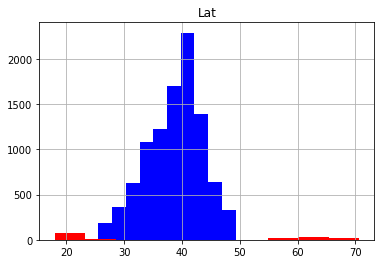

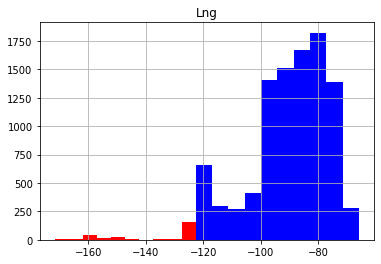

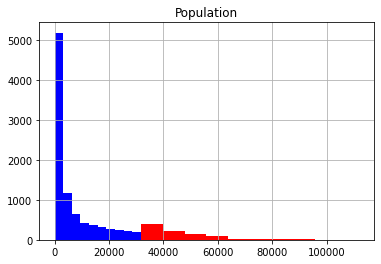

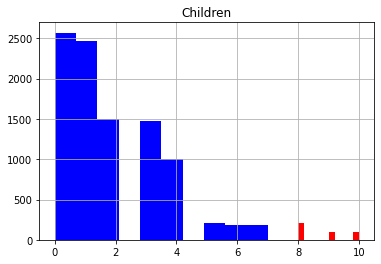

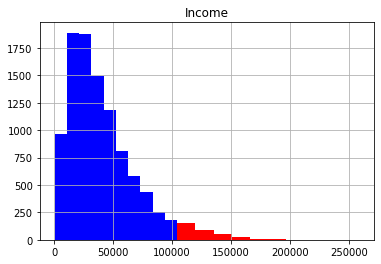

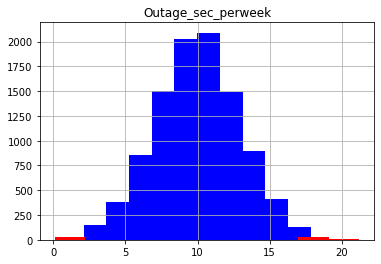

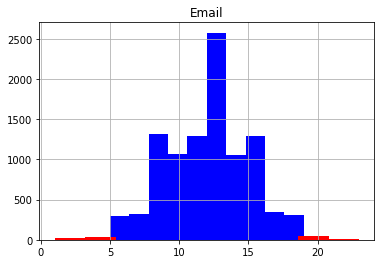

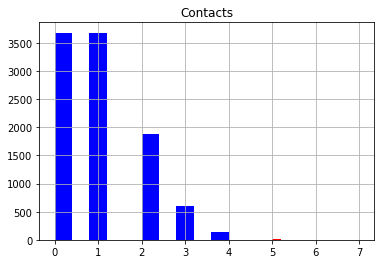

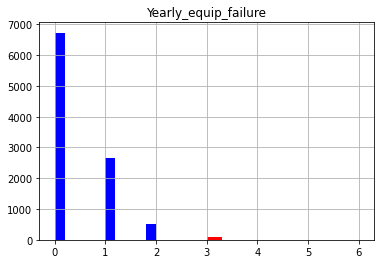

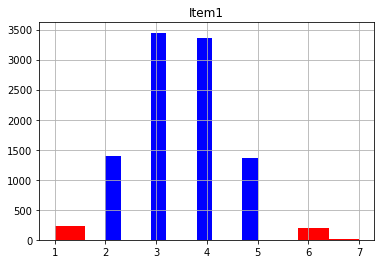

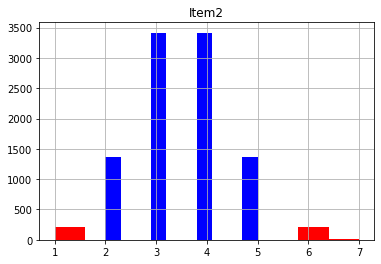

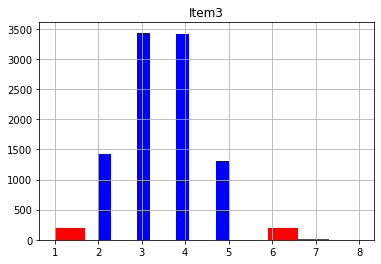

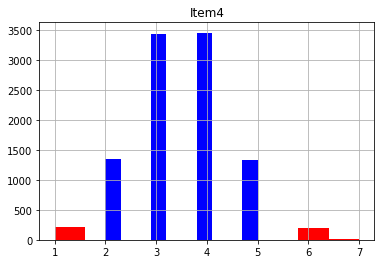

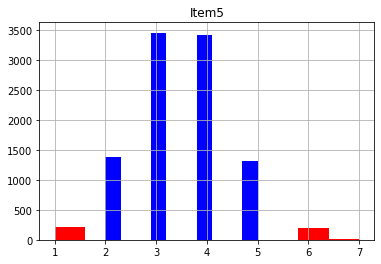

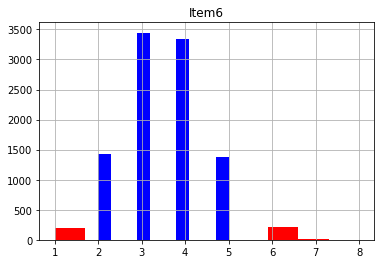

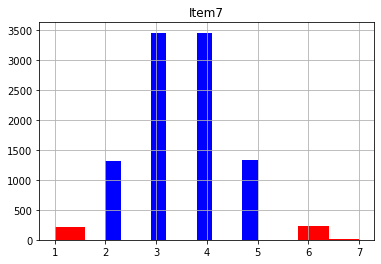

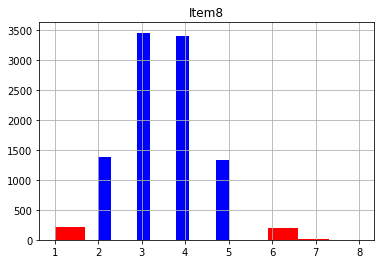

In [143]:
for col in outlier_id_df.columns[:21]:
    if np.sum(outlier_id_df[f'{col}_outlier']) > 0:
        fig, ax = plt.subplots()
        col_no_outlier = outlier_id_df.loc[outlier_id_df[f'{col}_outlier']==0, f'{col}']
        col_outlier = outlier_id_df.loc[outlier_id_df[f'{col}_outlier']==1, f'{col}']
        col_no_outlier.hist(color='blue')
        col_outlier.hist(color='red')
        plt.title(f'{col}')

In [144]:
numeric_df = data[numeric_cols]

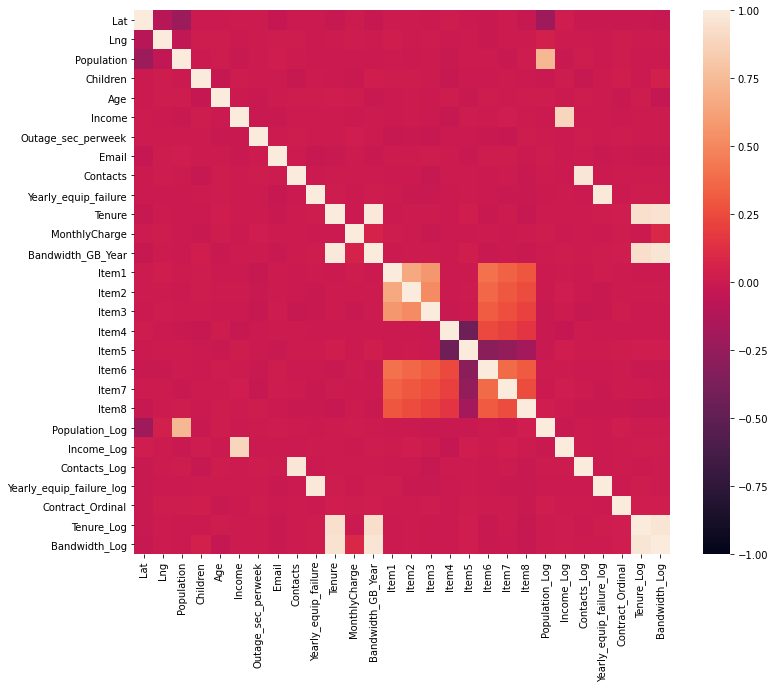

In [145]:
corr_mat = numeric_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, vmin=-1, vmax=1)
plt.show()

In [146]:
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if abs(numeric_df[col1].corr(numeric_df[col2])) > 0.3 and abs(numeric_df[col1].corr(numeric_df[col2])) < 1:
            print(f'{col1} vs. {col2}: {numeric_df[col1].corr(numeric_df[col2])}')

Lng vs. Lng: 0.9999999999999999
Population vs. Population_Log: 0.7288886627434153
Income vs. Income_Log: 0.8829900134538141
Contacts vs. Contacts: 0.9999999999999999
Contacts vs. Contacts_Log: 0.9690071605816667
Yearly_equip_failure vs. Yearly_equip_failure_log: 0.9834846545461744
Tenure vs. Bandwidth_GB_Year: 0.9914951921640125
Tenure vs. Tenure_Log: 0.9417676012490847
Tenure vs. Bandwidth_Log: 0.9502945322271565
Bandwidth_GB_Year vs. Tenure: 0.9914951921640124
Bandwidth_GB_Year vs. Tenure_Log: 0.934279905772443
Bandwidth_GB_Year vs. Bandwidth_Log: 0.9657565223255514
Item1 vs. Item2: 0.6630687413300218
Item1 vs. Item3: 0.5780125331949714
Item1 vs. Item6: 0.40280369815191575
Item1 vs. Item7: 0.3367822736634495
Item2 vs. Item1: 0.6630687413300218
Item2 vs. Item2: 0.9999999999999998
Item2 vs. Item3: 0.5201942172468236
Item2 vs. Item6: 0.3632470028101065
Item2 vs. Item7: 0.3003239041015097
Item3 vs. Item1: 0.5780125331949714
Item3 vs. Item2: 0.5201942172468236
Item3 vs. Item3: 0.999999999

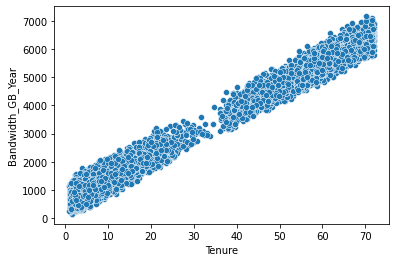

In [147]:
sns.scatterplot(x='Tenure', y='Bandwidth_GB_Year', data=data)
plt.show()

In [148]:
for col1 in numeric_df.columns:
    if abs(numeric_df['MonthlyCharge'].corr(numeric_df[col1])) < 1:
        print(f'MonthlyCharge vs. {col1}: {numeric_df["MonthlyCharge"].corr(numeric_df[col1])}')

MonthlyCharge vs. Lat: 0.0014060031884714217
MonthlyCharge vs. Lng: 0.011765329372433634
MonthlyCharge vs. Population: -0.004778273573737152
MonthlyCharge vs. Children: -0.009781398625998399
MonthlyCharge vs. Age: 0.010728511515483421
MonthlyCharge vs. Income: -0.003013964983478661
MonthlyCharge vs. Outage_sec_perweek: 0.020496073549462156
MonthlyCharge vs. Email: 0.001996554341201112
MonthlyCharge vs. Contacts: 0.004258646801150507
MonthlyCharge vs. Yearly_equip_failure: -0.007172276388344662
MonthlyCharge vs. Tenure: -0.0033368104134518925
MonthlyCharge vs. Bandwidth_GB_Year: 0.060406430837983104
MonthlyCharge vs. Item1: 0.00975622295210067
MonthlyCharge vs. Item2: 0.0034420590175131
MonthlyCharge vs. Item3: -0.008487062519495913
MonthlyCharge vs. Item4: -0.00044005249901639973
MonthlyCharge vs. Item5: -0.005562378029341476
MonthlyCharge vs. Item6: 0.002942520687142437
MonthlyCharge vs. Item7: -0.00639923394564828
MonthlyCharge vs. Item8: 0.002203840589308031
MonthlyCharge vs. Popula

In [149]:
numeric_cols_reduced = [col for col in numeric_cols if col not in ['Population', 'Income', 'Contacts', 
                                                                   'Yearly_equip_failure', 'Tenure', 
                                                                   'Bandwidth_GB_Year']]

In [150]:
print(numeric_cols_reduced)

['Lat', 'Lng', 'Children', 'Age', 'Outage_sec_perweek', 'Email', 'MonthlyCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population_Log', 'Income_Log', 'Contacts_Log', 'Yearly_equip_failure_log', 'Contract_Ordinal', 'Tenure_Log', 'Bandwidth_Log']


In [151]:
df_numeric_reduced = data[numeric_cols_reduced]

In [152]:
df_le = data[le_cols]

In [153]:
for col in df_le.columns:
    le = LabelEncoder()
    df_le[f'LE_{col}'] = le.fit_transform(df_le[col])

<ipython-input-153-29e1f81d955d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le[f'LE_{col}'] = le.fit_transform(df_le[col])
<ipython-input-153-29e1f81d955d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le[f'LE_{col}'] = le.fit_transform(df_le[col])
<ipython-input-153-29e1f81d955d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [154]:
final_le_cols = [col for col in df_le.columns if col.startswith('LE_')]
print(final_le_cols)

['LE_Techie', 'LE_Port_modem', 'LE_Tablet', 'LE_Phone', 'LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup', 'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV', 'LE_StreamingMovies', 'LE_PaperlessBilling']


In [155]:
df_le_final = df_le[final_le_cols]

In [156]:
df_oh = data[oh_enc_cols]

In [157]:
#oh_enc_cols

In [158]:
df_oh_final = pd.get_dummies(df_oh, drop_first=True)

In [159]:
df_final_round1 = pd.concat([df_numeric_reduced, df_le_final, df_oh_final], axis=1)

In [160]:
X = df_final_round1.drop('MonthlyCharge', axis=1)
y = df_final_round1['MonthlyCharge']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [162]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
preds = model1.predict(X_test)

In [163]:
print(mean_squared_error(y_test, preds))

77.97414203791621


In [164]:
residuals = y_test - preds
residuals

9394    -9.515264
898      8.471486
2398     9.471626
5906    -9.082906
2343     9.051673
          ...    
8764    10.323821
4359    -8.980514
2041     9.013377
1108     7.710288
3332    -9.381390
Name: MonthlyCharge, Length: 2500, dtype: float64

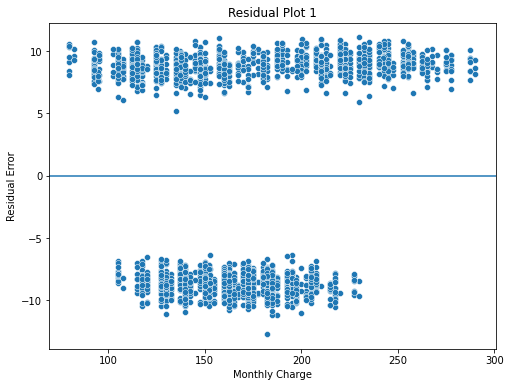

In [165]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0)
plt.title('Residual Plot 1')
plt.xlabel('Monthly Charge')
plt.ylabel('Residual Error')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


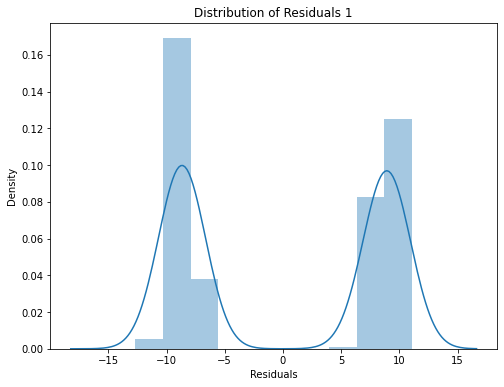

In [166]:
plt.figure(figsize=(8,6))
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals 1')
plt.show()

In [167]:
model1.coef_

array([-3.93961390e-02,  6.29171274e-03, -1.31071538e-02,  1.14406140e-02,
       -4.71249339e-03,  6.68338668e-03, -9.15027397e-02,  3.48538347e-01,
       -1.17269821e-01,  1.47114477e-01,  1.42630735e-01, -8.09612004e-02,
       -5.21383402e-03, -1.87646666e-02, -3.53859193e-02,  1.55619098e-01,
       -8.31378573e-02, -6.04232059e-02, -4.82435080e-02, -1.47636867e+00,
        2.23787434e+00,  2.03628289e-01, -3.32640151e-01, -3.79379890e-01,
       -4.57929577e-01,  3.23928496e+01,  2.65251015e+00,  2.26432783e+01,
        1.22626777e+01,  1.26471293e+01,  4.19842235e+01,  5.21702104e+01,
        2.49720350e-01,  2.62953327e-01,  1.68807119e-01,  1.70664221e-01,
       -8.22950139e-02,  2.10412711e-02, -1.75370773e-02, -3.59764795e-01,
       -8.85996187e-01,  2.01829814e+01, -1.26587525e+01, -1.40393877e-01,
        6.03470438e-02,  7.71894991e-02, -1.32374872e+00, -6.55521678e-01,
       -5.98570583e-01, -1.08994984e+00, -1.24407284e+00,  5.98432414e-01,
       -1.49508940e+00, -

In [168]:
model1.intercept_

71.79174605543923

In [169]:
X_train_ols = sm.add_constant(X_train, prepend=True)

sm_model1 = sm.OLS(y_train, X_train_ols).fit()
print(sm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3067.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:54:42   Log-Likelihood:                -26915.
No. Observations:                7500   AIC:                         5.394e+04
Df Residuals:                    7443   BIC:                         5.434e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [170]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns

vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data

feature          VIF
0                                     Lat   172.185351
1                                     Lng   289.888099
2                                Children     2.020255
3                                     Age     7.856084
4                      Outage_sec_perweek    12.398945
5                                   Email    16.927403
6                                   Item1    27.255857
7                                   Item2    23.979020
8                                   Item3    20.117992
9                                   Item4    16.175966
10                                  Item5    17.175196
11                                  Item6    18.363403
12                                  Item7    16.596928
13                                  Item8    15.015893
14                         Population_Log    17.898303
15                             Income_Log   162.967081
16                           Contacts_Log     2.382010
17               Yearly_equip_failure_log     1.451052
18                       Contract_Ordinal     5.168662
19                             Tenure_Log   115.622032
20                          Bandwidth_Log  1363.426442
21                              LE_Techie     1.205809
22                          LE_Port_modem     1.926582
23                              LE_Tablet     1.449871
24                               LE_Phone    10.959781
25                            LE_Multiple     1.892065
26                      LE_OnlineSecurity     1.587534
27                        LE_OnlineBackup     1.859748
28                    LE_DeviceProtection     1.828880
29                         LE_TechSupport     1.605276
30                         LE_StreamingTV     2.176958
31                     LE_StreamingMovies     2.129527
32                    LE_PaperlessBilling     2.457258
33                          Area_Suburban     2.053207
34                             Area_Urban     2.015404
35                        Marital_Married     1.929422
36                  Marital_Never Married     1.939164
37                      Marital_Separated     1.952093
38                        Marital_Widowed     1.974415
39                            Gender_Male     1.972931
40                       Gender_Nonbinary     1.051016
41            InternetService_Fiber Optic     2.667450
42                   InternetService_None     1.790473
43  PaymentMethod_Credit Card (automatic)     1.949822
44         PaymentMethod_Electronic Check     2.540950
45             PaymentMethod_Mailed Check     2.070676
46                     Region_Great_Lakes    23.556323
47                          Region_Hawaii     2.061851
48                         Region_Midwest    31.396671
49                       Region_Northeast    49.122664
50                             Region_ORV    18.998956
51                     Region_Puerto_Rico     2.403330
52                       Region_Southeast    45.701409
53                       Region_Southwest    20.672426
54                      Region_West_Coast    13.437600
55                         Region_Western     3.923916

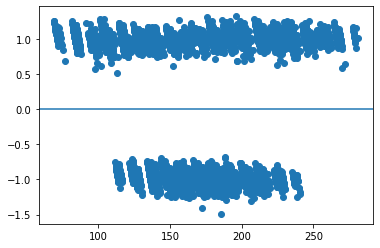

In [171]:
fig, ax = plt.subplots()
ax.scatter(sm_model1.fittedvalues, sm_model1.resid_pearson)
ax.axhline(0)
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


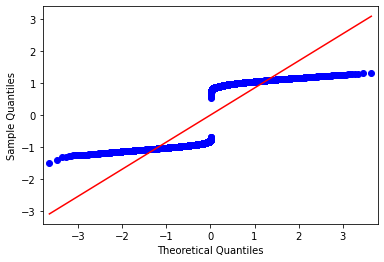

In [172]:
graphics.gofplots.qqplot(sm_model1.resid_pearson, line='r')
plt.show()

In [173]:
numeric_cols_reduced_log = [col for col in numeric_cols if col not in ['Population_Log', 'Income_Log', 'Contacts_Log', 
                                                                   'Yearly_equip_failure_log', 'Tenure_Log', 
                                                                       'Bandwidth_Log']]
print(numeric_cols_reduced_log)

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Contract_Ordinal']


In [174]:
df_numeric_reduced_log = data[numeric_cols_reduced_log]

In [175]:
df_final_round2 = pd.concat([df_numeric_reduced_log, df_le_final, df_oh_final], axis=1)
df_final_round2.head()

Lat        Lng  Population  Children  Age    Income  \
0  56.25100 -133.37571          38         0   68  28561.99   
1  44.32893  -84.24080       10446         1   27  21704.77   
2  45.35589 -123.24657        3735         4   50   9609.57   
3  32.96687 -117.24798       13863         1   48  18925.23   
4  29.38012  -95.80673       11352         0   83  40074.19   

   Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  ...  \
0            7.978323     10         0                     1  ...   
1           11.699080     12         0                     1  ...   
2           10.752800      9         0                     1  ...   
3           14.913540     15         2                     0  ...   
4            8.147417     16         2                     1  ...   

   Region_Great_Lakes  Region_Hawaii  Region_Midwest  Region_Northeast  \
0                   0              0               0                 0   
1                   1              0               0                 0   
2                   0              0               0                 0   
3                   0              0               0                 0   
4                   0              0               0                 0   

   Region_ORV  Region_Puerto_Rico  Region_Southeast  Region_Southwest  \
0           0                   0                 0                 0   
1           0                   0                 0                 0   
2           0                   0                 0                 0   
3           0                   0                 0                 0   
4           0                   0                 0                 1   

   Region_West_Coast  Region_Western  
0                  0               0  
1                  0               0  
2                  1               0  
3                  1               0  
4                  0               0  

[5 rows x 57 columns]

In [176]:
X = df_final_round2.drop('MonthlyCharge', axis=1)
y = df_final_round2['MonthlyCharge']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [178]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
preds = model2.predict(X_test)

In [179]:
print(mean_squared_error(y_test, preds))

8.358451798926472


In [180]:
residuals = y_test - preds
residuals

9394    1.295484
898     3.365081
2398    4.043637
5906   -3.734647
2343    3.791033
          ...   
8764    3.376779
4359    1.680205
2041   -2.301190
1108    3.180908
3332    1.751070
Name: MonthlyCharge, Length: 2500, dtype: float64

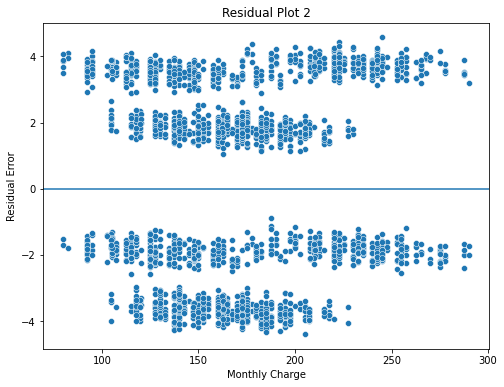

In [181]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0)
plt.title('Residual Plot 2')
plt.xlabel('Monthly Charge')
plt.ylabel('Residual Error')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


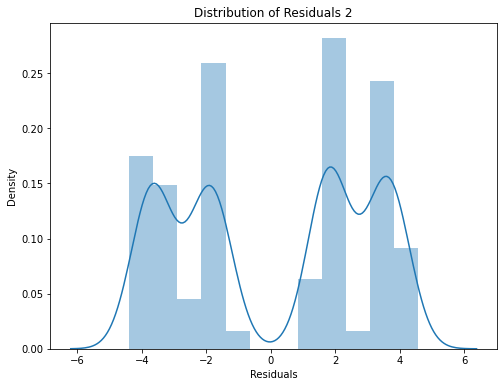

In [182]:
plt.figure(figsize=(8,6))
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals 2')
plt.show()

In [183]:
X_train_ols2 = sm.add_constant(X_train, prepend=True)

sm_model2 = sm.OLS(y_train, X_train_ols2).fit()
print(sm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.952e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:54:46   Log-Likelihood:                -18566.
No. Observations:                7500   AIC:                         3.725e+04
Df Residuals:                    7443   BIC:                         3.764e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [184]:
vif_data2 = pd.DataFrame()
vif_data2['feature'] = X_train.columns

vif_data2['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data2

feature           VIF
0                                     Lat    165.191032
1                                     Lng    236.585711
2                              Population      1.608460
3                                Children     11.518848
4                                     Age     45.613404
5                                  Income      2.992990
6                      Outage_sec_perweek     12.392389
7                                   Email     16.889395
8                                Contacts      2.020103
9                    Yearly_equip_failure      1.391928
10                                 Tenure  14179.701680
11                      Bandwidth_GB_Year  18157.503951
12                                  Item1     27.247742
13                                  Item2     23.996675
14                                  Item3     20.104196
15                                  Item4     16.133070
16                                  Item5     17.073336
17                                  Item6     18.359468
18                                  Item7     16.573425
19                                  Item8     15.006440
20                       Contract_Ordinal      5.160216
21                              LE_Techie      1.205486
22                          LE_Port_modem      1.927968
23                              LE_Tablet      1.450202
24                               LE_Phone     10.947176
25                            LE_Multiple      4.565581
26                      LE_OnlineSecurity      3.892840
27                        LE_OnlineBackup      6.395481
28                    LE_DeviceProtection      5.369861
29                         LE_TechSupport      1.618164
30                         LE_StreamingTV     30.899439
31                     LE_StreamingMovies     26.373721
32                    LE_PaperlessBilling      2.457564
33                          Area_Suburban      2.053363
34                             Area_Urban      2.015323
35                        Marital_Married      1.929073
36                  Marital_Never Married      1.938163
37                      Marital_Separated      1.951688
38                        Marital_Widowed      1.972680
39                            Gender_Male      4.189140
40                       Gender_Nonbinary      1.065442
41            InternetService_Fiber Optic     86.818586
42                   InternetService_None     42.223513
43  PaymentMethod_Credit Card (automatic)      1.949297
44         PaymentMethod_Electronic Check      2.540031
45             PaymentMethod_Mailed Check      2.070490
46                     Region_Great_Lakes     16.116859
47                          Region_Hawaii      2.003256
48                         Region_Midwest     21.713004
49                       Region_Northeast     32.086506
50                             Region_ORV     12.559706
51                     Region_Puerto_Rico      1.826731
52                       Region_Southeast     28.964701
53                       Region_Southwest     14.182045
54                      Region_West_Coast     10.688881
55                         Region_Western      3.176464

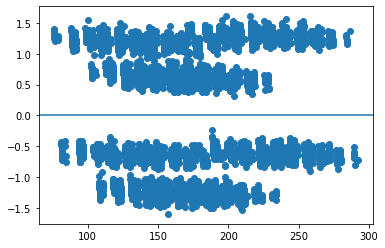

In [185]:
fig, ax = plt.subplots()
ax.scatter(sm_model2.fittedvalues, sm_model2.resid_pearson)
ax.axhline(0)
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


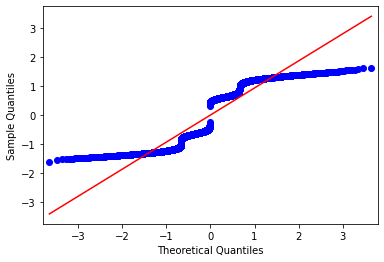

In [186]:
graphics.gofplots.qqplot(sm_model2.resid_pearson, line='r')
plt.show()

In [187]:
model3 = LinearRegression()

min_features_to_select = 1

rfecv = RFECV(estimator=model3, step=1, cv=KFold(3), scoring='neg_mean_squared_error',
             min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

RFECV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [188]:
print(rfecv.n_features_)

23


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


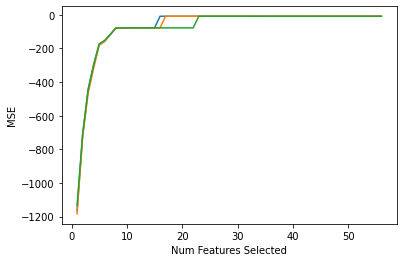

In [189]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('MSE')
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
plt.show()

In [190]:
features_unfiltered = rfecv.feature_names_in_

feature_index = np.where(rfecv.ranking_ == 1)

features_filtered = features_unfiltered[feature_index]

features_filtered

array(['Children', 'Age', 'Tenure', 'Bandwidth_GB_Year', 'LE_Multiple',
       'LE_OnlineSecurity', 'LE_OnlineBackup', 'LE_DeviceProtection',
       'LE_TechSupport', 'LE_StreamingTV', 'LE_StreamingMovies',
       'Gender_Male', 'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'PaymentMethod_Mailed Check',
       'Region_Great_Lakes', 'Region_Midwest', 'Region_ORV',
       'Region_Puerto_Rico', 'Region_Southeast', 'Region_Southwest',
       'Region_West_Coast'], dtype=object)

In [191]:
features_list = list(features_filtered)

X_final = X[features_list]
y_final = y

In [192]:
X_final.shape

(10000, 23)

In [193]:
y_final.shape

(10000,)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=0)

In [195]:
model4 = LinearRegression()
model4.fit(X_train, y_train)
preds = model4.predict(X_test)

In [196]:
print(mean_squared_error(y_test, preds))

8.277756559053433


In [197]:
residuals = y_test - preds
residuals

9394    1.580749
898     3.288404
2398    3.764210
5906   -3.818157
2343    3.859352
          ...   
8764    3.700028
4359    1.853478
2041   -2.113607
1108    3.304441
3332    1.661610
Name: MonthlyCharge, Length: 2500, dtype: float64

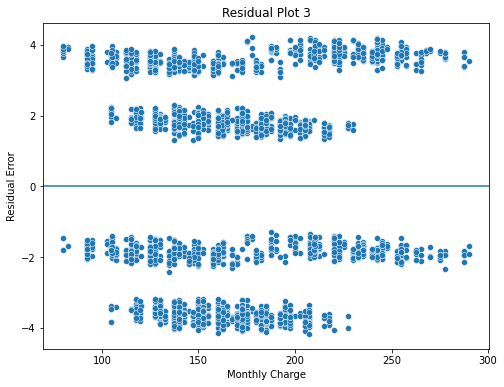

In [198]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0)
plt.title('Residual Plot 3')
plt.xlabel('Monthly Charge')
plt.ylabel('Residual Error')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


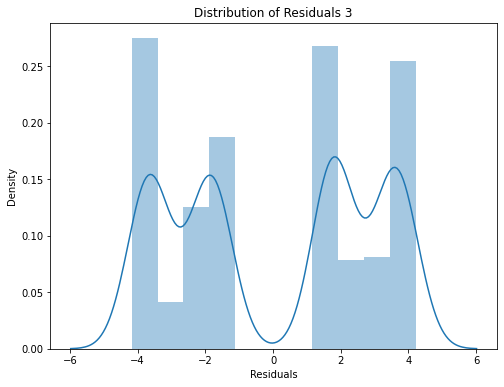

In [199]:
plt.figure(figsize=(8,6))
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals 3')
plt.show()

In [200]:
X_train_ols3 = sm.add_constant(X_train, prepend=True)

sm_model3 = sm.OLS(y_train, X_train_ols3).fit()
print(sm_model3.summary())

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.191e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:54:52   Log-Likelihood:                -18580.
No. Observations:                7500   AIC:                         3.721e+04
Df Residuals:                    7476   BIC:                         3.737e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [201]:
vif_data3 = pd.DataFrame()
vif_data3['feature'] = X_train.columns

vif_data3['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data3

feature          VIF
0                      Children     3.028656
1                           Age     5.527985
2                        Tenure   917.277512
3             Bandwidth_GB_Year  1137.517897
4                   LE_Multiple     2.251168
5             LE_OnlineSecurity     1.840936
6               LE_OnlineBackup     2.373651
7           LE_DeviceProtection     2.236078
8                LE_TechSupport     1.608863
9                LE_StreamingTV     4.544272
10           LE_StreamingMovies     4.155046
11                  Gender_Male     2.276631
12             Gender_Nonbinary     1.044209
13  InternetService_Fiber Optic     5.690102
14         InternetService_None     3.237870
15   PaymentMethod_Mailed Check     1.307181
16           Region_Great_Lakes     1.500422
17               Region_Midwest     1.737503
18                   Region_ORV     1.361096
19           Region_Puerto_Rico     1.020190
20             Region_Southeast     1.860251
21             Region_Southwest     1.440623
22            Region_West_Coast     1.363062

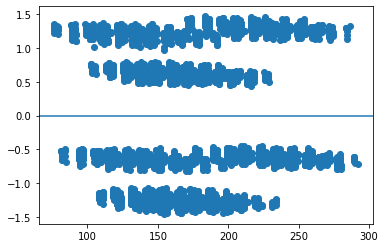

In [202]:
fig, ax = plt.subplots()
ax.scatter(sm_model3.fittedvalues, sm_model3.resid_pearson)
ax.axhline(0)
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


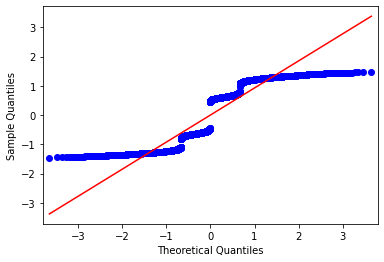

In [203]:
graphics.gofplots.qqplot(sm_model3.resid_pearson, line='r')
plt.show()

In [204]:
features_list

['Children',
 'Age',
 'Tenure',
 'Bandwidth_GB_Year',
 'LE_Multiple',
 'LE_OnlineSecurity',
 'LE_OnlineBackup',
 'LE_DeviceProtection',
 'LE_TechSupport',
 'LE_StreamingTV',
 'LE_StreamingMovies',
 'Gender_Male',
 'Gender_Nonbinary',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'PaymentMethod_Mailed Check',
 'Region_Great_Lakes',
 'Region_Midwest',
 'Region_ORV',
 'Region_Puerto_Rico',
 'Region_Southeast',
 'Region_Southwest',
 'Region_West_Coast']

In [205]:
features_list.remove('Bandwidth_GB_Year')

X_final2 = X[features_list]
y_final2 = y

X_train, X_test, y_train, y_test = train_test_split(X_final2, y_final2, test_size=0.25, random_state=0)

model5 = LinearRegression()
model5.fit(X_train, y_train)
preds = model5.predict(X_test)

print(mean_squared_error(y_test, preds))

77.79328865611573


In [206]:
features_list.append('Bandwidth_GB_Year')
features_list.remove('Tenure')

X_final3 = X[features_list]
y_final3 = y

X_train, X_test, y_train, y_test = train_test_split(X_final3, y_final3, test_size=0.25, random_state=0)

model6 = LinearRegression()
model6.fit(X_train, y_train)
preds = model6.predict(X_test)

print(mean_squared_error(y_test, preds))

77.8184655034956


In [207]:
features_list.append('Tenure')

In [208]:
features_pvalue_low = np.where(sm_model3.pvalues < 0.05)
features_pvalue_low = list(features_pvalue_low[0])

params_low_p = list(sm_model3.params.index[features_pvalue_low])
params_low_p

['const',
 'Children',
 'Age',
 'Tenure',
 'Bandwidth_GB_Year',
 'LE_Multiple',
 'LE_OnlineSecurity',
 'LE_OnlineBackup',
 'LE_DeviceProtection',
 'LE_TechSupport',
 'LE_StreamingTV',
 'LE_StreamingMovies',
 'Gender_Male',
 'Gender_Nonbinary',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'Region_Midwest']

In [209]:
params_low_p.remove('const')

X_final5 = X[params_low_p]
y_final5 = y

X_train, X_test, y_train, y_test = train_test_split(X_final5, y_final5, test_size=0.25, random_state=0)

model8 = LinearRegression()
model8.fit(X_train, y_train)
preds = model8.predict(X_test)

print(mean_squared_error(y_test, preds))

8.275751769724703


In [210]:
residuals = y_test - preds
residuals

9394    1.661012
898     3.481358
2398    3.843186
5906   -3.743331
2343    3.826499
          ...   
8764    3.658122
4359    1.849802
2041   -2.142444
1108    3.392581
3332    1.855876
Name: MonthlyCharge, Length: 2500, dtype: float64

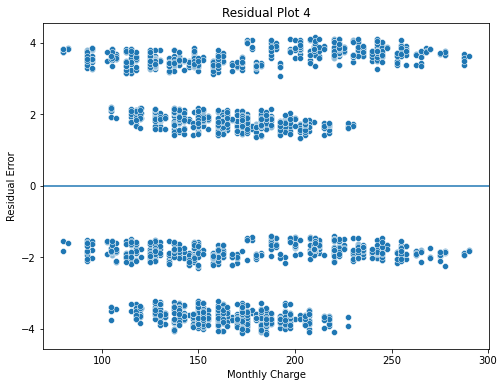

In [211]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0)
plt.title('Residual Plot 4')
plt.xlabel('Monthly Charge')
plt.ylabel('Residual Error')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


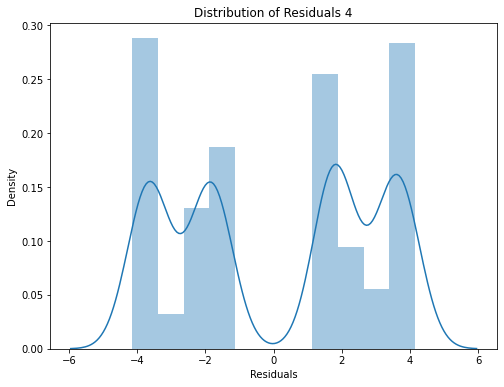

In [212]:
plt.figure(figsize=(8,6))
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals 4')
plt.show()

In [213]:
X_train_ols4 = sm.add_constant(X_train, prepend=True)

sm_model4 = sm.OLS(y_train, X_train_ols4).fit()
print(sm_model4.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.034e+05
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:54:54   Log-Likelihood:                -18583.
No. Observations:                7500   AIC:                         3.720e+04
Df Residuals:                    7483   BIC:                         3.732e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [214]:
vif_data4 = pd.DataFrame()
vif_data4['feature'] = X_train.columns

vif_data4['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data4

feature         VIF
0                      Children    2.917897
1                           Age    5.118566
2                        Tenure  778.228661
3             Bandwidth_GB_Year  959.327437
4                   LE_Multiple    2.228997
5             LE_OnlineSecurity    1.813172
6               LE_OnlineBackup    2.327867
7           LE_DeviceProtection    2.190086
8                LE_TechSupport    1.608132
9                LE_StreamingTV    4.261309
10           LE_StreamingMovies    3.912460
11                  Gender_Male    2.256215
12             Gender_Nonbinary    1.043632
13  InternetService_Fiber Optic    4.889172
14         InternetService_None    2.851459
15               Region_Midwest    1.210061

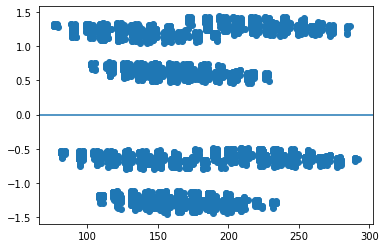

In [215]:
fig, ax = plt.subplots()
ax.scatter(sm_model4.fittedvalues, sm_model4.resid_pearson)
ax.axhline(0)
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


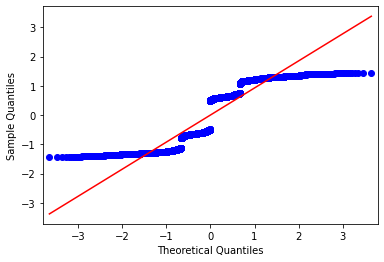

In [216]:
graphics.gofplots.qqplot(sm_model4.resid_pearson, line='r')
plt.show()

In [217]:
params_copy = params_low_p.copy()

In [218]:
params_copy

['Children',
 'Age',
 'Tenure',
 'Bandwidth_GB_Year',
 'LE_Multiple',
 'LE_OnlineSecurity',
 'LE_OnlineBackup',
 'LE_DeviceProtection',
 'LE_TechSupport',
 'LE_StreamingTV',
 'LE_StreamingMovies',
 'Gender_Male',
 'Gender_Nonbinary',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'Region_Midwest']

In [219]:
params_copy.remove('Tenure')

X_final6 = X[params_copy]
y_final6 = y

X_train, X_test, y_train, y_test = train_test_split(X_final6, y_final6, test_size=0.25, random_state=0)

model9 = LinearRegression()
model9.fit(X_train, y_train)
preds = model9.predict(X_test)

print(mean_squared_error(y_test, preds))

77.79845572795993


In [220]:
params_copy.remove('Bandwidth_GB_Year')

X_final7 = X[params_copy]
y_final7 = y

X_train, X_test, y_train, y_test = train_test_split(X_final7, y_final7, test_size=0.25, random_state=0)

model10 = LinearRegression()
model10.fit(X_train, y_train)
preds = model10.predict(X_test)

print(mean_squared_error(y_test, preds))

77.7645098497876


In [221]:
X['Tenure_Bandwidth_Interaction'] = X['Tenure'] * X['Bandwidth_GB_Year']

In [222]:
params_copy.append('Tenure_Bandwidth_Interaction')

X_final8 = X[params_copy]
y_final8 = y

X_train, X_test, y_train, y_test = train_test_split(X_final8, y_final8, test_size=0.25, random_state=0)

model11 = LinearRegression()
model11.fit(X_train, y_train)
preds = model11.predict(X_test)

print(mean_squared_error(y_test, preds))

77.78125548439667


In [223]:
residuals = y_test - preds
residuals

9394    -9.197098
898      9.148951
2398     9.261619
5906    -8.922524
2343    10.027143
          ...    
8764     9.802651
4359    -8.964821
2041     8.389438
1108     7.845703
3332    -9.262417
Name: MonthlyCharge, Length: 2500, dtype: float64

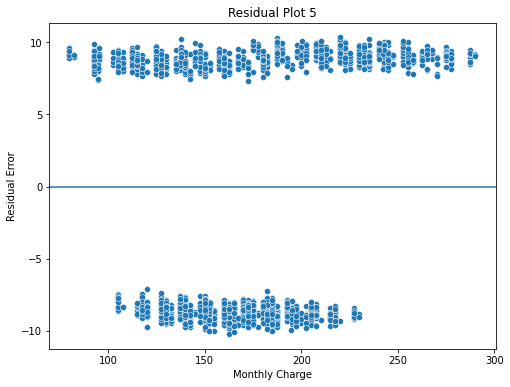

In [224]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0)
plt.title('Residual Plot 5')
plt.xlabel('Monthly Charge')
plt.ylabel('Residual Error')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


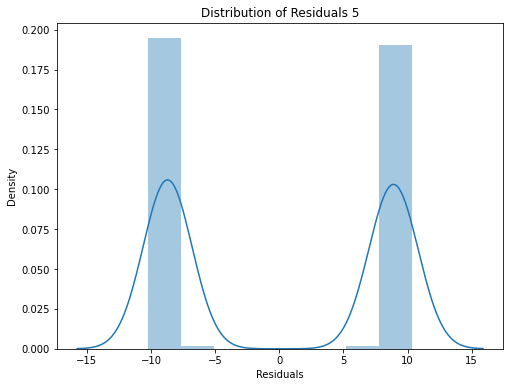

In [225]:
plt.figure(figsize=(8,6))
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals 5')
plt.show()

In [226]:
X_train_ols5 = sm.add_constant(X_train, prepend=True)

sm_model5 = sm.OLS(y_train, X_train_ols5).fit()
print(sm_model5.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.144e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:54:55   Log-Likelihood:                -26937.
No. Observations:                7500   AIC:                         5.391e+04
Df Residuals:                    7484   BIC:                         5.402e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


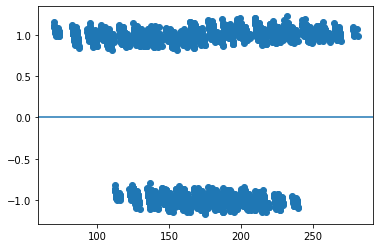

In [227]:
fig, ax = plt.subplots()
ax.scatter(sm_model5.fittedvalues, sm_model5.resid_pearson)
ax.axhline(0)
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


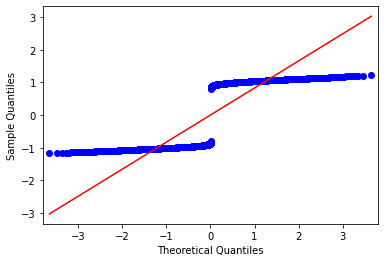

In [228]:
graphics.gofplots.qqplot(sm_model5.resid_pearson, line='r')
plt.show()

In [229]:
X['Tenure_Bandwidth_Interaction_Log'] = np.log(X['Tenure_Bandwidth_Interaction'])

params_copy.append('Tenure_Bandwidth_Interaction_Log')
params_copy.remove('Tenure_Bandwidth_Interaction')

X_final9 = X[params_copy]
y_final9 = y

X_train, X_test, y_train, y_test = train_test_split(X_final9, y_final9, test_size=0.25, random_state=0)

model12 = LinearRegression()
model12.fit(X_train, y_train)
preds = model12.predict(X_test)

print(mean_squared_error(y_test, preds))

77.80849297348084


In [230]:
residuals = y_test - preds
residuals

9394    -9.212878
898      9.206715
2398     9.280325
5906    -8.915376
2343    10.092195
          ...    
8764     9.763754
4359    -8.969087
2041     8.407876
1108     7.933390
3332    -9.256172
Name: MonthlyCharge, Length: 2500, dtype: float64

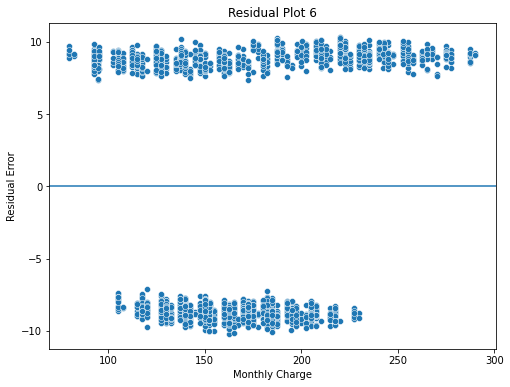

In [231]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0)
plt.title('Residual Plot 6')
plt.xlabel('Monthly Charge')
plt.ylabel('Residual Error')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


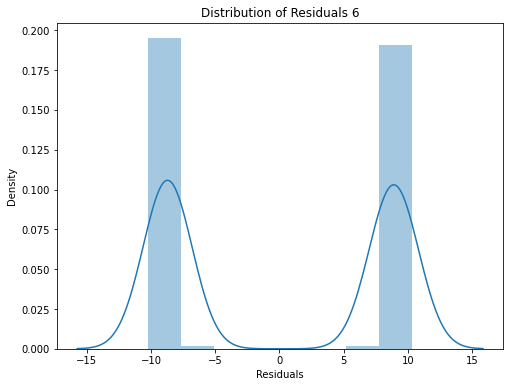

In [232]:
plt.figure(figsize=(8,6))
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals 6')
plt.show()

In [233]:
X_train_ols6 = sm.add_constant(X_train, prepend=True)

sm_model6 = sm.OLS(y_train, X_train_ols6).fit()
print(sm_model6.summary())

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.144e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:54:55   Log-Likelihood:                -26937.
No. Observations:                7500   AIC:                         5.391e+04
Df Residuals:                    7484   BIC:                         5.402e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [234]:
all_cols = list(X.columns)

all_cols_no_tenure = [col for col in all_cols if col not in ['Tenure', 'Tenure_Bandwidth_Interaction',
                                                            'Tenure_Bandwidth_Interaction_Log']]
all_cols_no_bandwidth_w_tenure = [col for col in all_cols if col not in ['Bandwidth_GB_Year', 
                                                                         'Tenure_Bandwidth_Interaction',
                                                            'Tenure_Bandwidth_Interaction_Log']]
all_cols_tenure_bandwidth_inter = [col for col in all_cols if col not in ['Tenure', 'Bandwidth_GB_Year',
                                                            'Tenure_Bandwidth_Interaction_Log']]
all_cols_tenure_bandwidth_inter_log = [col for col in all_cols if col not in ['Tenure', 'Tenure_Bandwidth_Interaction',
                                                            'Bandwidth_GB_Year']]

all_cols_tenure_and_bandwidth = [col for col in all_cols if col not in ['Tenure_Bandwidth_Interaction',
                                                            'Tenure_Bandwidth_Interaction_Log']]

all_cols_no_tenure_or_bandwidth = [col for col in all_cols if col not in ['Tenure', 'Tenure_Bandwidth_Interaction',
                                                            'Tenure_Bandwidth_Interaction_Log', 
                                                                          'Bandwidth_GB_Year']]

In [235]:
model_no_tenure = LinearRegression()
X_no_tenure = X[all_cols_no_tenure]
y_no_tenure = y

min_features = 1

rfecv_no_tenure = RFECV(estimator=model_no_tenure, step=1, cv=KFold(5), scoring='neg_mean_squared_error',
                       min_features_to_select=min_features)
rfecv_no_tenure.fit(X_no_tenure, y_no_tenure)

print(rfecv_no_tenure.n_features_)

10


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


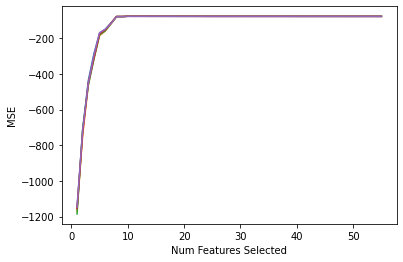

In [236]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('MSE')
plt.plot(range(min_features, len(rfecv_no_tenure.grid_scores_) + min_features), rfecv_no_tenure.grid_scores_)
plt.show()

In [237]:
features_unfiltered_no_tenure = rfecv_no_tenure.feature_names_in_

feature_index_no_tenure = np.where(rfecv_no_tenure.ranking_ == 1)

features_filtered_no_tenure = features_unfiltered_no_tenure[feature_index_no_tenure]

features_filtered_no_tenure

array(['LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup',
       'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV',
       'LE_StreamingMovies', 'InternetService_Fiber Optic',
       'InternetService_None', 'Region_Puerto_Rico'], dtype=object)

In [238]:
model_no_tenure_final = LinearRegression()

X_no_tenure_final = X[list(features_filtered_no_tenure)]
y_no_tenure_final = y

k_fold_no_tenure = KFold(n_splits=5)

mse_no_tenure = []

for train_index, test_index in k_fold_no_tenure.split(X_no_tenure_final):
    X_train, y_train = X_no_tenure_final.iloc[train_index], y_no_tenure_final.iloc[train_index]
    X_test, y_test = X_no_tenure_final.iloc[test_index], y_no_tenure_final.iloc[test_index]
    
    model_no_tenure_final.fit(X_train, y_train)
    preds = model_no_tenure_final.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    
    mse_no_tenure.append(mse)

In [239]:
mse_no_tenure

[77.586068623826,
 77.20876268083876,
 77.21011068105985,
 77.46222209982744,
 77.52502316495062]

In [240]:
np.mean(mse_no_tenure)

77.39843745010053

In [241]:
sm_model_no_tenure = sm.OLS(y_no_tenure_final, sm.add_constant(X_no_tenure_final, prepend=True)).fit()
print(sm_model_no_tenure.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.285e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:54:59   Log-Likelihood:                -35923.
No. Observations:               10000   AIC:                         7.187e+04
Df Residuals:                    9989   BIC:                         7.195e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [242]:
model_no_bandwidth_w_tenure = LinearRegression()
X_no_bandwidth_w_tenure = X[all_cols_no_bandwidth_w_tenure]
y_no_bandwidth_w_tenure = y

min_features = 1

rfecv_no_bandwidth_w_tenure = RFECV(estimator=model_no_bandwidth_w_tenure, step=1, cv=KFold(5), scoring='neg_mean_squared_error',
                       min_features_to_select=min_features)
rfecv_no_bandwidth_w_tenure.fit(X_no_bandwidth_w_tenure, y_no_bandwidth_w_tenure)

print(rfecv_no_bandwidth_w_tenure.n_features_)

10


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


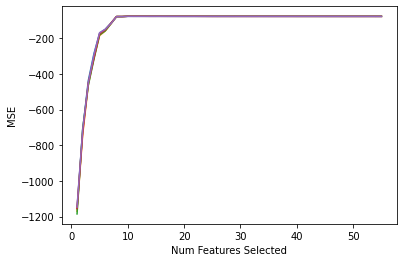

In [243]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('MSE')
plt.plot(range(min_features, len(rfecv_no_bandwidth_w_tenure.grid_scores_) + min_features), 
         rfecv_no_bandwidth_w_tenure.grid_scores_)
plt.show()

In [244]:
features_unfiltered_no_bandwidth_w_tenure = rfecv_no_bandwidth_w_tenure.feature_names_in_

feature_index_no_bandwidth_w_tenure = np.where(rfecv_no_bandwidth_w_tenure.ranking_ == 1)

features_filtered_no_bandwidth_w_tenure = features_unfiltered_no_bandwidth_w_tenure[feature_index_no_bandwidth_w_tenure]

features_filtered_no_bandwidth_w_tenure

array(['LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup',
       'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV',
       'LE_StreamingMovies', 'InternetService_Fiber Optic',
       'InternetService_None', 'Region_Puerto_Rico'], dtype=object)

In [245]:
model_tenure_bandwidth_inter = LinearRegression()
X_tenure_bandwidth_inter = X[all_cols_tenure_bandwidth_inter]
y_tenure_bandwidth_inter = y

min_features = 1

rfecv_tenure_bandwidth_inter = RFECV(estimator=model_tenure_bandwidth_inter, step=1, cv=KFold(5), scoring='neg_mean_squared_error',
                       min_features_to_select=min_features)
rfecv_tenure_bandwidth_inter.fit(X_tenure_bandwidth_inter, y_tenure_bandwidth_inter)

print(rfecv_tenure_bandwidth_inter.n_features_)

10


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


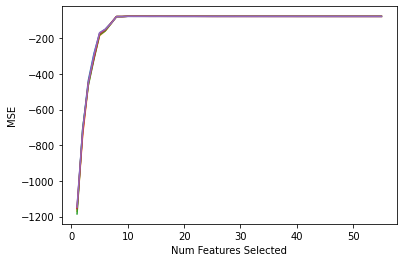

In [246]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('MSE')
plt.plot(range(min_features, len(rfecv_tenure_bandwidth_inter.grid_scores_) + min_features), 
         rfecv_tenure_bandwidth_inter.grid_scores_)
plt.show()

In [247]:
features_unfiltered_tenure_bandwidth_inter = rfecv_tenure_bandwidth_inter.feature_names_in_

feature_index_tenure_bandwidth_inter = np.where(rfecv_tenure_bandwidth_inter.ranking_ == 1)

features_filtered_tenure_bandwidth_inter = features_unfiltered_tenure_bandwidth_inter[feature_index_tenure_bandwidth_inter]

features_filtered_tenure_bandwidth_inter

array(['LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup',
       'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV',
       'LE_StreamingMovies', 'InternetService_Fiber Optic',
       'InternetService_None', 'Region_Puerto_Rico'], dtype=object)

In [248]:
model_tenure_bandwidth_inter_log = LinearRegression()
X_tenure_bandwidth_inter_log = X[all_cols_tenure_bandwidth_inter_log]
y_tenure_bandwidth_inter_log = y

min_features = 1

rfecv_tenure_bandwidth_inter_log = RFECV(estimator=model_tenure_bandwidth_inter_log, step=1, cv=KFold(5), scoring='neg_mean_squared_error',
                       min_features_to_select=min_features)
rfecv_tenure_bandwidth_inter_log.fit(X_tenure_bandwidth_inter_log, y_tenure_bandwidth_inter_log)

print(rfecv_tenure_bandwidth_inter_log.n_features_)

10


In [249]:
features_unfiltered_tenure_bandwidth_inter_log = rfecv_tenure_bandwidth_inter_log.feature_names_in_

feature_index_tenure_bandwidth_inter_log = np.where(rfecv_tenure_bandwidth_inter_log.ranking_ == 1)

features_filtered_tenure_bandwidth_inter_log = features_unfiltered_tenure_bandwidth_inter_log[feature_index_tenure_bandwidth_inter_log]

features_filtered_tenure_bandwidth_inter_log

array(['LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup',
       'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV',
       'LE_StreamingMovies', 'InternetService_Fiber Optic',
       'InternetService_None', 'Region_Puerto_Rico'], dtype=object)

In [250]:
model_tenure_and_bandwidth = LinearRegression()
X_tenure_and_bandwidth = X[all_cols_tenure_and_bandwidth]
y_tenure_and_bandwidth = y

min_features = 1

rfecv_tenure_and_bandwidth = RFECV(estimator=model_tenure_and_bandwidth, step=1, cv=KFold(5), 
                                   scoring='neg_mean_squared_error',
                       min_features_to_select=min_features)
rfecv_tenure_and_bandwidth.fit(X_tenure_and_bandwidth, y_tenure_and_bandwidth)

print(rfecv_tenure_and_bandwidth.n_features_)

16


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


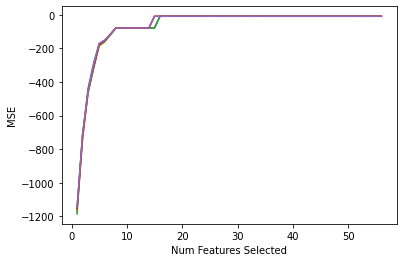

In [251]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('MSE')
plt.plot(range(min_features, len(rfecv_tenure_and_bandwidth.grid_scores_) + min_features), 
         rfecv_tenure_and_bandwidth.grid_scores_)
plt.show()

In [252]:
features_unfiltered_tenure_and_bandwidth = rfecv_tenure_and_bandwidth.feature_names_in_

feature_index_tenure_and_bandwidth = np.where(rfecv_tenure_and_bandwidth.ranking_ == 1)

features_filtered_tenure_and_bandwidth = features_unfiltered_tenure_and_bandwidth[feature_index_tenure_and_bandwidth]

features_filtered_tenure_and_bandwidth

array(['Children', 'Age', 'Tenure', 'Bandwidth_GB_Year', 'LE_Multiple',
       'LE_OnlineSecurity', 'LE_OnlineBackup', 'LE_DeviceProtection',
       'LE_TechSupport', 'LE_StreamingTV', 'LE_StreamingMovies',
       'Gender_Male', 'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'Region_Puerto_Rico'], dtype=object)

In [253]:
model_tenure_and_bandwidth_final = LinearRegression()

X_tenure_and_bandwidth_final = X[list(features_filtered_tenure_and_bandwidth)]
y_tenure_and_bandwidth_final = y

k_fold_tenure_and_bandwidth = KFold(n_splits=5)

mse_tenure_and_bandwidth = []

for train_index, test_index in k_fold_tenure_and_bandwidth.split(X_tenure_and_bandwidth_final):
    X_train, y_train = X_tenure_and_bandwidth_final.iloc[train_index], y_tenure_and_bandwidth_final.iloc[train_index]
    X_test, y_test = X_tenure_and_bandwidth_final.iloc[test_index], y_tenure_and_bandwidth_final.iloc[test_index]
    
    model_tenure_and_bandwidth_final.fit(X_train, y_train)
    preds = model_tenure_and_bandwidth_final.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    
    mse_tenure_and_bandwidth.append(mse)

In [254]:
mse_tenure_and_bandwidth

[8.2337866613068,
 8.2887803784926,
 8.353146597587983,
 8.324362803026851,
 8.428689517060157]

In [255]:
np.mean(mse_tenure_and_bandwidth)

8.32575319149488

In [256]:
sm_model_tenure_and_bandwidth = sm.OLS(y_tenure_and_bandwidth_final, sm.add_constant(X_tenure_and_bandwidth_final, prepend=True)).fit()
print(sm_model_tenure_and_bandwidth.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.380e+05
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:55:11   Log-Likelihood:                -24770.
No. Observations:               10000   AIC:                         4.957e+04
Df Residuals:                    9983   BIC:                         4.970e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [257]:
model_no_tenure_or_bandwidth = LinearRegression()
X_no_tenure_or_bandwidth = X[all_cols_no_tenure_or_bandwidth]
y_no_tenure_or_bandwidth = y

min_features = 1

rfecv_no_tenure_or_bandwidth = RFECV(estimator=model_no_tenure_or_bandwidth, step=1, cv=KFold(5), scoring='neg_mean_squared_error',
                       min_features_to_select=min_features)
rfecv_no_tenure_or_bandwidth.fit(X_no_tenure_or_bandwidth, y_no_tenure_or_bandwidth)

print(rfecv_no_tenure_or_bandwidth.n_features_)

10


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


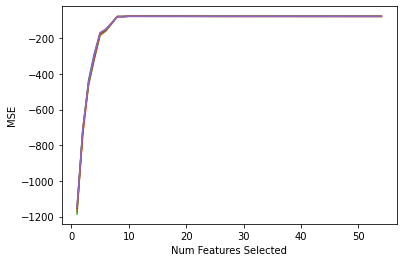

In [258]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('MSE')
plt.plot(range(min_features, len(rfecv_no_tenure_or_bandwidth.grid_scores_) + min_features), 
         rfecv_no_tenure_or_bandwidth.grid_scores_)
plt.show()

In [259]:
features_unfiltered_no_tenure_or_bandwidth = rfecv_no_tenure_or_bandwidth.feature_names_in_

feature_index_no_tenure_or_bandwidth = np.where(rfecv_no_tenure_or_bandwidth.ranking_ == 1)

features_filtered_no_tenure_or_bandwidth = features_unfiltered_no_tenure_or_bandwidth[feature_index_no_tenure_or_bandwidth]

features_filtered_no_tenure_or_bandwidth

array(['LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup',
       'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV',
       'LE_StreamingMovies', 'InternetService_Fiber Optic',
       'InternetService_None', 'Region_Puerto_Rico'], dtype=object)

In [260]:
model_params_low_p = LinearRegression()
X_params_low_p = X[params_low_p]
y_params_low_p = y

min_features = 1

rfecv_params_low_p = RFECV(estimator=model_params_low_p, step=1, cv=KFold(5), scoring='neg_mean_squared_error',
                       min_features_to_select=min_features)
rfecv_params_low_p.fit(X_params_low_p, y_params_low_p)

print(rfecv_params_low_p.n_features_)

16


In [261]:
len(params_low_p)

16

In [262]:
params_low_p

['Children',
 'Age',
 'Tenure',
 'Bandwidth_GB_Year',
 'LE_Multiple',
 'LE_OnlineSecurity',
 'LE_OnlineBackup',
 'LE_DeviceProtection',
 'LE_TechSupport',
 'LE_StreamingTV',
 'LE_StreamingMovies',
 'Gender_Male',
 'Gender_Nonbinary',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'Region_Midwest']

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


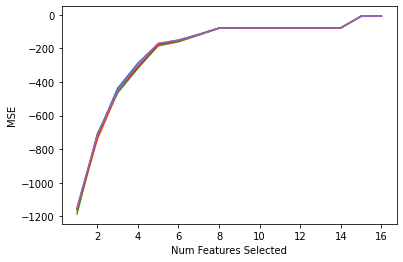

In [263]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('MSE')
plt.plot(range(min_features, len(rfecv_params_low_p.grid_scores_) + min_features), 
         rfecv_params_low_p.grid_scores_)
plt.show()

In [264]:
model_params_low_p = LinearRegression()

X_params_low_p = X[params_low_p]
y_params_low_p = y

k_fold_params_low_p = KFold(n_splits=5)

mse_params_low_p = []

for train_index, test_index in k_fold_params_low_p.split(X_params_low_p):
    X_train, y_train = X_params_low_p.iloc[train_index], y_params_low_p.iloc[train_index]
    X_test, y_test = X_params_low_p.iloc[test_index], y_params_low_p.iloc[test_index]
    
    model_params_low_p.fit(X_train, y_train)
    preds = model_params_low_p.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    
    mse_params_low_p.append(mse) 

In [265]:
mse_params_low_p

[8.224378776720274,
 8.28422958714831,
 8.34718922179203,
 8.322013817338524,
 8.432024276849855]

In [266]:
np.mean(mse_params_low_p)

8.321967135969796

In [267]:
sm_model_params_low_p = sm.OLS(y_params_low_p, sm.add_constant(X_params_low_p, prepend=True)).fit()
print(sm_model_params_low_p.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.380e+05
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:55:15   Log-Likelihood:                -24769.
No. Observations:               10000   AIC:                         4.957e+04
Df Residuals:                    9983   BIC:                         4.969e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [268]:
params_low_p_no_regions = [val for val in params_low_p if val != 'Region_Midwest']
params_low_p_no_regions

['Children',
 'Age',
 'Tenure',
 'Bandwidth_GB_Year',
 'LE_Multiple',
 'LE_OnlineSecurity',
 'LE_OnlineBackup',
 'LE_DeviceProtection',
 'LE_TechSupport',
 'LE_StreamingTV',
 'LE_StreamingMovies',
 'Gender_Male',
 'Gender_Nonbinary',
 'InternetService_Fiber Optic',
 'InternetService_None']

In [269]:
model_params_low_p_no_regions = LinearRegression()

X_params_low_p_no_regions = X[params_low_p_no_regions]
y_params_low_p_no_regions = y

k_fold_params_low_p_no_regions = KFold(n_splits=5)

mse_params_low_p_no_regions = []

for train_index, test_index in k_fold_params_low_p_no_regions.split(X_params_low_p_no_regions):
    X_train, y_train = X_params_low_p_no_regions.iloc[train_index], y_params_low_p_no_regions.iloc[train_index]
    X_test, y_test = X_params_low_p_no_regions.iloc[test_index], y_params_low_p_no_regions.iloc[test_index]
    
    model_params_low_p_no_regions.fit(X_train, y_train)
    preds = model_params_low_p_no_regions.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    
    mse_params_low_p_no_regions.append(mse) 

In [270]:
mse_params_low_p_no_regions

[8.231107175096911,
 8.289486411329184,
 8.348598231344432,
 8.325090011697938,
 8.429472446518691]

In [271]:
np.mean(mse_params_low_p_no_regions)

8.324750855197431

In [272]:
sm_model_params_low_p_no_regions = sm.OLS(y_params_low_p_no_regions, 
                                          sm.add_constant(X_params_low_p_no_regions, prepend=True)).fit()
print(sm_model_params_low_p_no_regions.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.472e+05
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:55:15   Log-Likelihood:                -24770.
No. Observations:               10000   AIC:                         4.957e+04
Df Residuals:                    9984   BIC:                         4.969e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


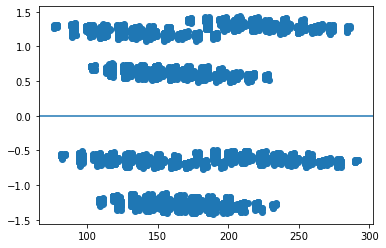

In [273]:
fig, ax = plt.subplots()
ax.scatter(sm_model_params_low_p.fittedvalues, sm_model_params_low_p.resid_pearson)
ax.axhline(0)
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


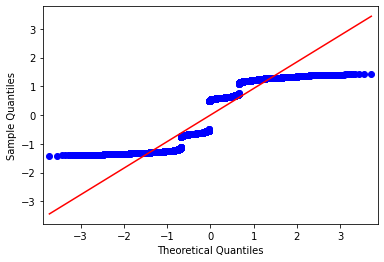

In [274]:
graphics.gofplots.qqplot(sm_model_params_low_p.resid_pearson, line='r')
plt.show()

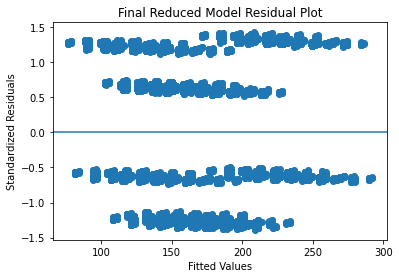

In [275]:
fig, ax = plt.subplots()
ax.scatter(sm_model_params_low_p_no_regions.fittedvalues, sm_model_params_low_p_no_regions.resid_pearson)
ax.axhline(0)
plt.title('Final Reduced Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

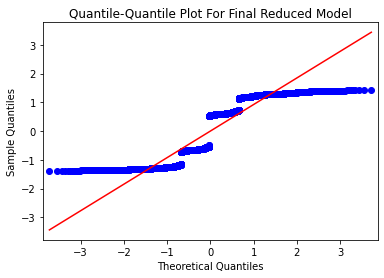

In [276]:
graphics.gofplots.qqplot(sm_model_params_low_p_no_regions.resid_pearson, line='r')
plt.title('Quantile-Quantile Plot For Final Reduced Model')
plt.show()

In [277]:
df_final_round2.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Contract_Ordinal', 'LE_Techie', 'LE_Port_modem', 'LE_Tablet',
       'LE_Phone', 'LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup',
       'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV',
       'LE_StreamingMovies', 'LE_PaperlessBilling', 'Area_Suburban',
       'Area_Urban', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Region_Great_Lakes', 'Region_Hawaii', 'Region_Midwest',
       'Region_Northeast', 'Region_ORV', 'Region_Puerto_R

In [278]:
X_original = df_final_round2.drop('MonthlyCharge', axis=1)
y_original = df_final_round2['MonthlyCharge']

sm_model_original_full = sm.OLS(y_original, sm.add_constant(X_original, prepend=True)).fit()
print(sm_model_original_full.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.939e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:55:16   Log-Likelihood:                -24755.
No. Observations:               10000   AIC:                         4.962e+04
Df Residuals:                    9943   BIC:                         5.003e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [279]:
sm_model_original_full.resid

0      -3.241057
1      -1.670329
2       1.579636
3       1.875860
4       1.817231
          ...   
9995   -2.077871
9996    1.495066
9997    3.459184
9998    3.543721
9999   -3.634005
Length: 10000, dtype: float64

In [280]:
sm_model_original_full.nobs

10000.0

In [281]:
len(sm_model_original_full.params)

57

In [282]:
sm_model_original_full.resid ** 2

0       10.504448
1        2.789999
2        2.495251
3        3.518851
4        3.302327
          ...    
9995     4.317547
9996     2.235223
9997    11.965952
9998    12.557961
9999    13.205995
Length: 10000, dtype: float64

In [283]:
sm_model_original_full.resid_pearson

array([-1.12358523, -0.57905715,  0.54761654, ...,  1.19920392,
        1.22851081, -1.25980978])

In [284]:
residuals_initial = sm_model_original_full.resid
n_observations_initial = sm_model_original_full.nobs
squared_residuals_initial = residuals_initial ** 2
sum_residuals_initial = np.sum(squared_residuals_initial)
mean_residuals_initial = sum_residuals_initial / n_observations_initial
sqrt_mean_residuals_initial = np.sqrt(mean_residuals_initial)
print(sqrt_mean_residuals_initial)

2.876333934959979


In [285]:
residuals_reduced = sm_model_params_low_p_no_regions.resid
n_observations_reduced = sm_model_params_low_p_no_regions.nobs
squared_residuals_reduced = residuals_reduced ** 2
sum_residuals_reduced = np.sum(squared_residuals_reduced)
mean_residuals_reduced = sum_residuals_reduced / n_observations_reduced
sqrt_mean_residuals_reduced = np.sqrt(mean_residuals_reduced)
print(sqrt_mean_residuals_reduced)

2.880924878256292


In [286]:
print(sm_model_original_full.fittedvalues)

0       175.696576
1       244.302883
2       158.367947
3       118.080980
4       148.131085
           ...    
9995    162.057271
9996    205.986034
9997    166.514916
9998    249.080279
9999    221.118005
Length: 10000, dtype: float64


In [287]:
print(sm_model_params_low_p_no_regions.fittedvalues)

0       176.046134
1       244.509985
2       158.275733
3       118.106257
4       148.096866
           ...    
9995    162.024115
9996    205.869093
9997    166.621784
9998    248.988292
9999    221.267001
Length: 10000, dtype: float64


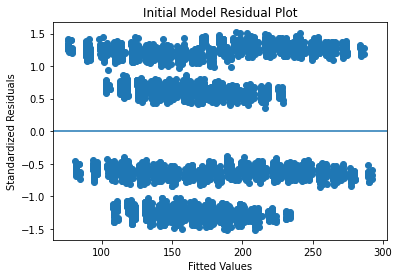

In [288]:
fig, ax = plt.subplots()
ax.scatter(sm_model_original_full.fittedvalues, sm_model_original_full.resid_pearson)
ax.axhline(0)
plt.title('Initial Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


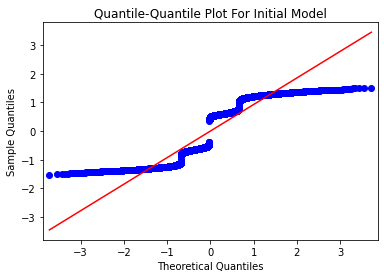

In [289]:
graphics.gofplots.qqplot(sm_model_original_full.resid_pearson, line='r')
plt.title('Quantile-Quantile Plot For Initial Model')
plt.show()

In [290]:
model_original_final = LinearRegression()

X_params_original = X_original
y_params_original = y_original

k_fold_params_original = KFold(n_splits=5)

mse_params_original = []

for train_index, test_index in k_fold_params_original.split(X_params_original):
    X_train, y_train = X_params_original.iloc[train_index], y_params_original.iloc[train_index]
    X_test, y_test = X_params_original.iloc[test_index], y_params_original.iloc[test_index]
    
    model_original_final.fit(X_train, y_train)
    preds = model_original_final.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    
    mse_params_original.append(mse) 

In [291]:
mse_params_original

[8.276710248517661,
 8.301983143394033,
 8.40435807196405,
 8.381003510022342,
 8.466408559417385]

In [292]:
np.mean(mse_params_original)

8.366092706663093

In [293]:
numeric_cols_final = list(outlier_id_df.columns[:21])
numeric_cols_final

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [294]:
cols_final_for_visualization = numeric_cols_final + le_cols + oh_enc_cols
cols_final_for_visualization

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'Techie',
 'Port_modem',
 'Tablet',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Area',
 'Marital',
 'Gender',
 'InternetService',
 'PaymentMethod',
 'Region']

In [295]:
len(cols_final_for_visualization)

39

In [296]:
cols_final_for_visualization = cols_final_for_visualization + ['Contract']
cols_final_for_visualization

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'Techie',
 'Port_modem',
 'Tablet',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Area',
 'Marital',
 'Gender',
 'InternetService',
 'PaymentMethod',
 'Region',
 'Contract']

In [297]:
df_viz = data[cols_final_for_visualization]

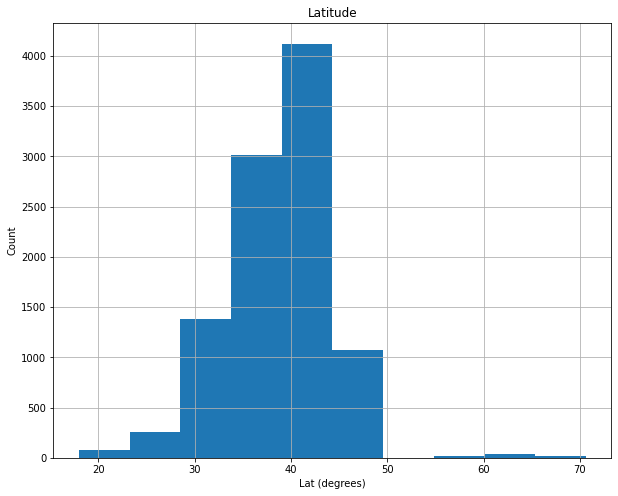

In [298]:
plt.figure(figsize=(10,8))
df_viz['Lat'].hist()
plt.title('Latitude')
plt.xlabel('Lat (degrees)')
plt.ylabel('Count')
plt.show()

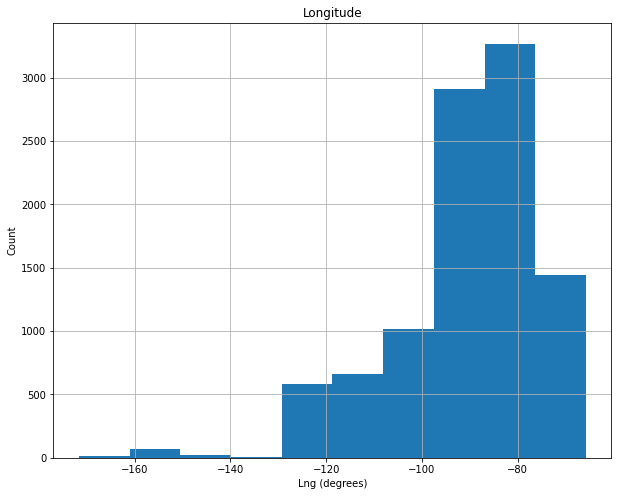

In [299]:
plt.figure(figsize=(10,8))
df_viz['Lng'].hist()
plt.title('Longitude')
plt.xlabel('Lng (degrees)')
plt.ylabel('Count')
plt.show()

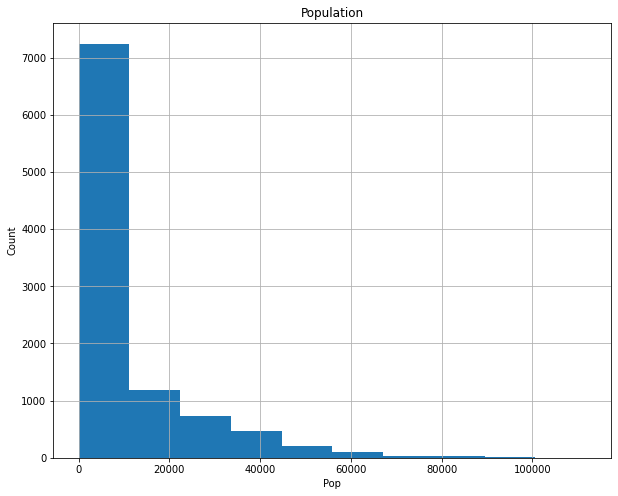

In [300]:
plt.figure(figsize=(10,8))
df_viz['Population'].hist()
plt.title('Population')
plt.xlabel('Pop')
plt.ylabel('Count')
plt.show()

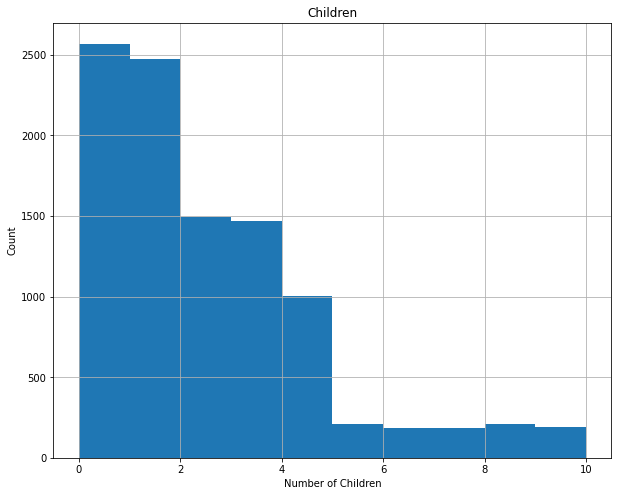

In [301]:
plt.figure(figsize=(10,8))
df_viz['Children'].hist()
plt.title('Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

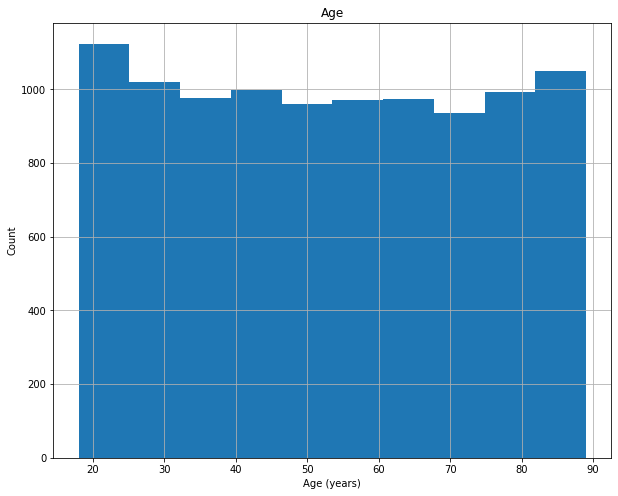

In [302]:
plt.figure(figsize=(10,8))
df_viz['Age'].hist()
plt.title('Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

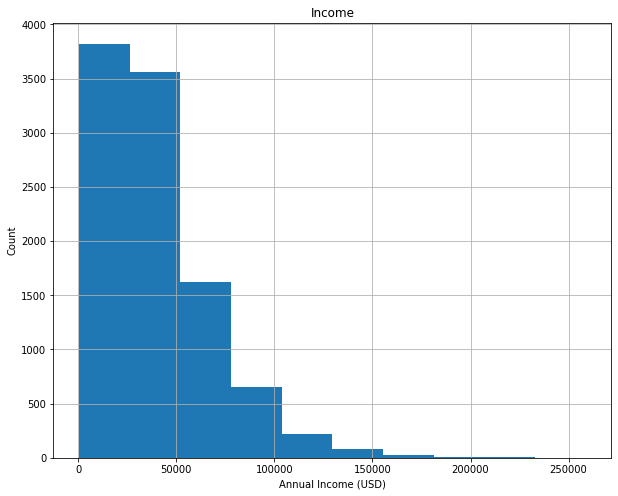

In [303]:
plt.figure(figsize=(10,8))
df_viz['Income'].hist()
plt.title('Income')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Count')
plt.show()

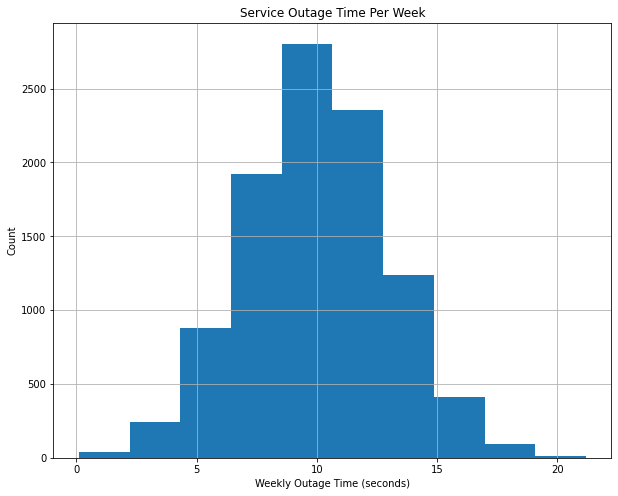

In [304]:
plt.figure(figsize=(10,8))
df_viz['Outage_sec_perweek'].hist()
plt.title('Service Outage Time Per Week')
plt.xlabel('Weekly Outage Time (seconds)')
plt.ylabel('Count')
plt.show()

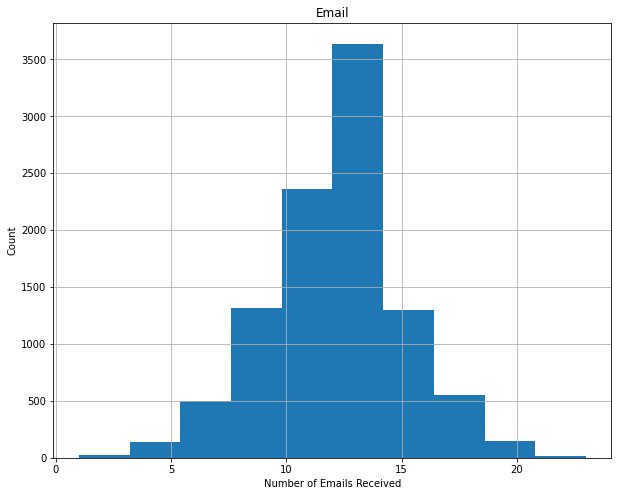

In [305]:
plt.figure(figsize=(10,8))
df_viz['Email'].hist()
plt.title('Email')
plt.xlabel('Number of Emails Received')
plt.ylabel('Count')
plt.show()

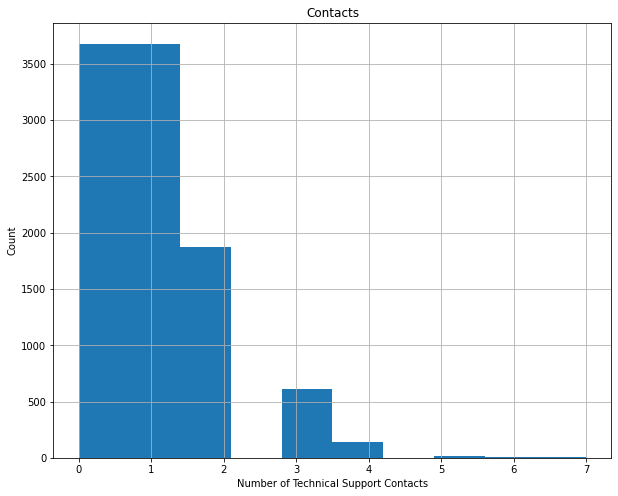

In [306]:
plt.figure(figsize=(10,8))
df_viz['Contacts'].hist()
plt.title('Contacts')
plt.xlabel('Number of Technical Support Contacts')
plt.ylabel('Count')
plt.show()

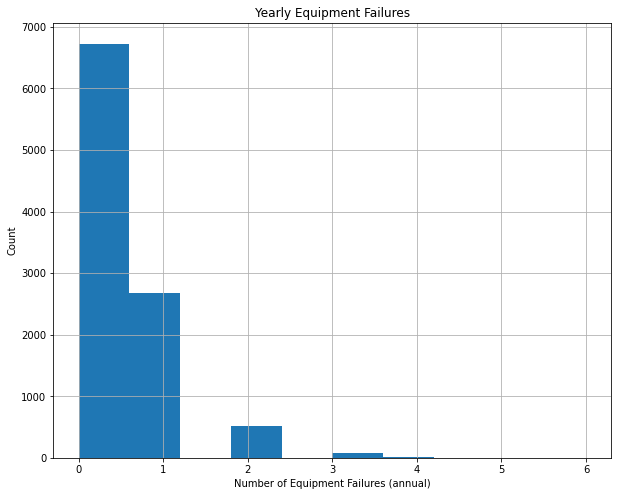

In [307]:
plt.figure(figsize=(10,8))
df_viz['Yearly_equip_failure'].hist()
plt.title('Yearly Equipment Failures')
plt.xlabel('Number of Equipment Failures (annual)')
plt.ylabel('Count')
plt.show()

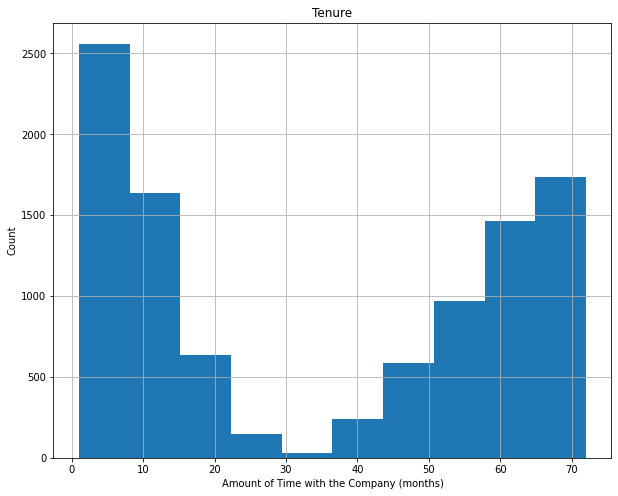

In [308]:
plt.figure(figsize=(10,8))
df_viz['Tenure'].hist()
plt.title('Tenure')
plt.xlabel('Amount of Time with the Company (months)')
plt.ylabel('Count')
plt.show()

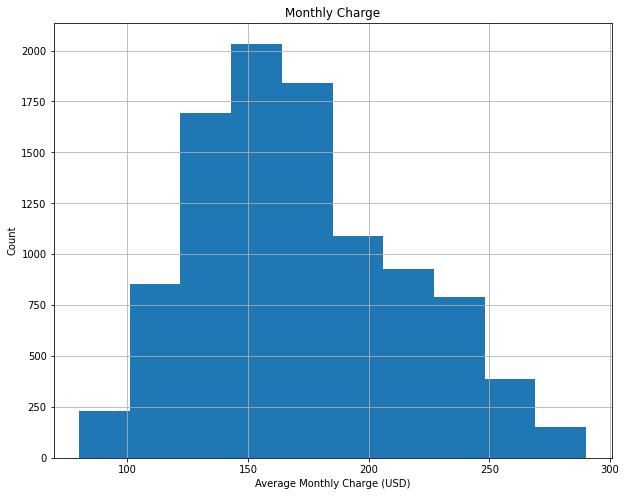

In [309]:
plt.figure(figsize=(10,8))
df_viz['MonthlyCharge'].hist()
plt.title('Monthly Charge')
plt.xlabel('Average Monthly Charge (USD)')
plt.ylabel('Count')
plt.show()

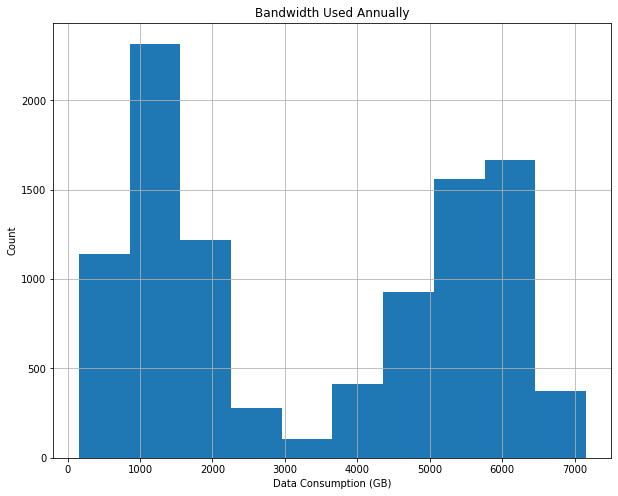

In [310]:
plt.figure(figsize=(10,8))
df_viz['Bandwidth_GB_Year'].hist()
plt.title('Bandwidth Used Annually')
plt.xlabel('Data Consumption (GB)')
plt.ylabel('Count')
plt.show()

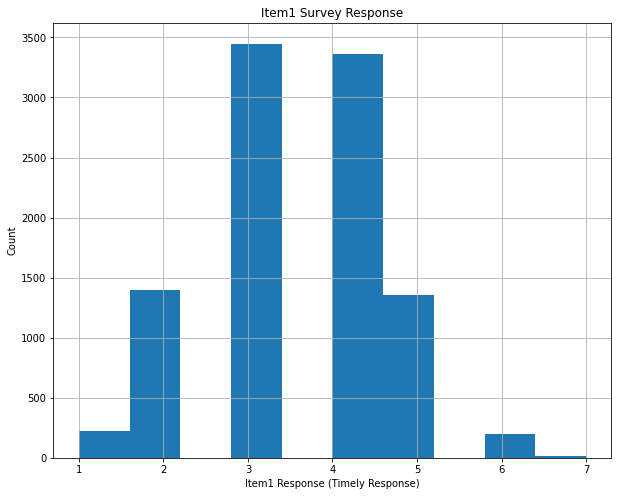

In [311]:
plt.figure(figsize=(10,8))
df_viz['Item1'].hist()
plt.title('Item1 Survey Response')
plt.xlabel('Item1 Response (Timely Response)')
plt.ylabel('Count')
plt.show()

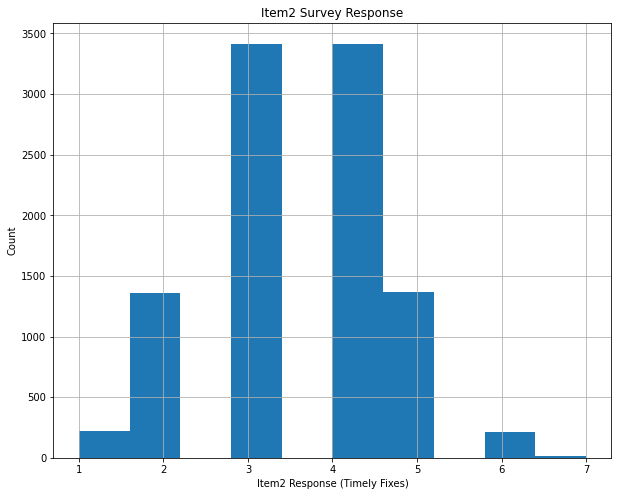

In [312]:
plt.figure(figsize=(10,8))
df_viz['Item2'].hist()
plt.title('Item2 Survey Response')
plt.xlabel('Item2 Response (Timely Fixes)')
plt.ylabel('Count')
plt.show()

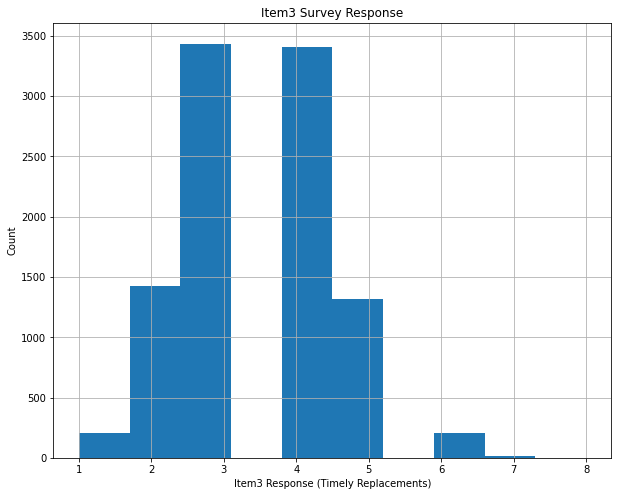

In [313]:
plt.figure(figsize=(10,8))
df_viz['Item3'].hist()
plt.title('Item3 Survey Response')
plt.xlabel('Item3 Response (Timely Replacements)')
plt.ylabel('Count')
plt.show()

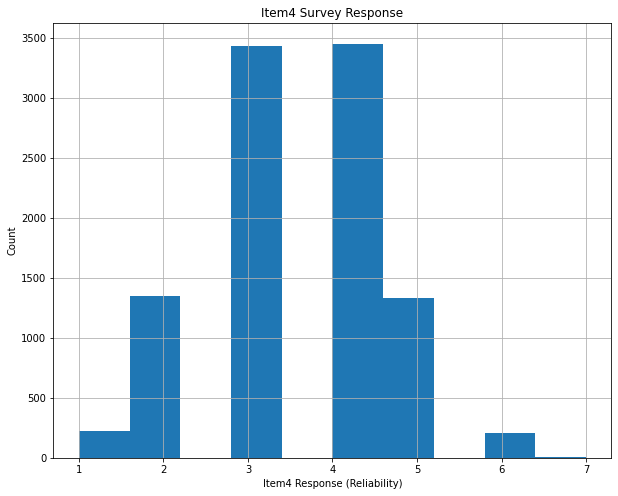

In [314]:
plt.figure(figsize=(10,8))
df_viz['Item4'].hist()
plt.title('Item4 Survey Response')
plt.xlabel('Item4 Response (Reliability)')
plt.ylabel('Count')
plt.show()

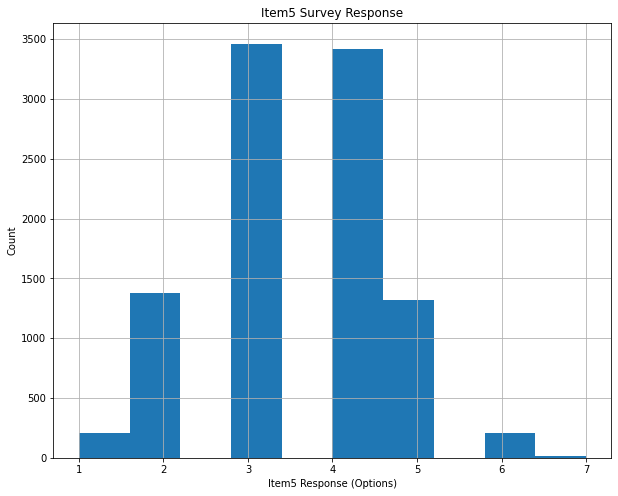

In [315]:
plt.figure(figsize=(10,8))
df_viz['Item5'].hist()
plt.title('Item5 Survey Response')
plt.xlabel('Item5 Response (Options)')
plt.ylabel('Count')
plt.show()

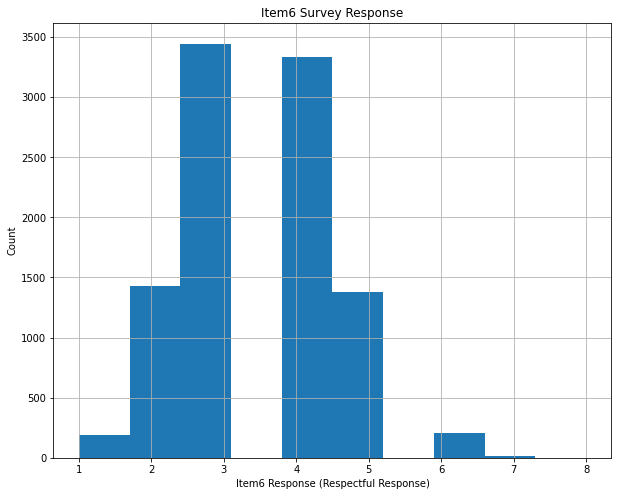

In [316]:
plt.figure(figsize=(10,8))
df_viz['Item6'].hist()
plt.title('Item6 Survey Response')
plt.xlabel('Item6 Response (Respectful Response)')
plt.ylabel('Count')
plt.show()

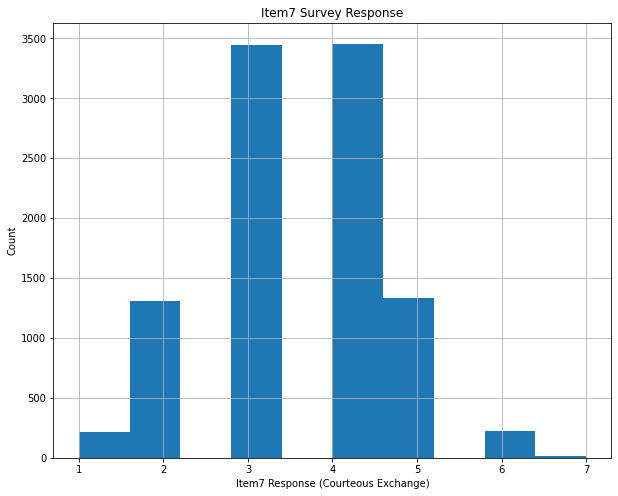

In [317]:
plt.figure(figsize=(10,8))
df_viz['Item7'].hist()
plt.title('Item7 Survey Response')
plt.xlabel('Item7 Response (Courteous Exchange)')
plt.ylabel('Count')
plt.show()

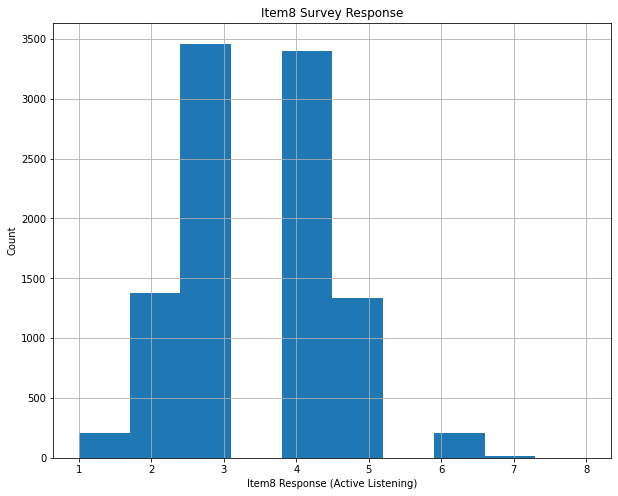

In [318]:
plt.figure(figsize=(10,8))
df_viz['Item8'].hist()
plt.title('Item8 Survey Response')
plt.xlabel('Item8 Response (Active Listening)')
plt.ylabel('Count')
plt.show()

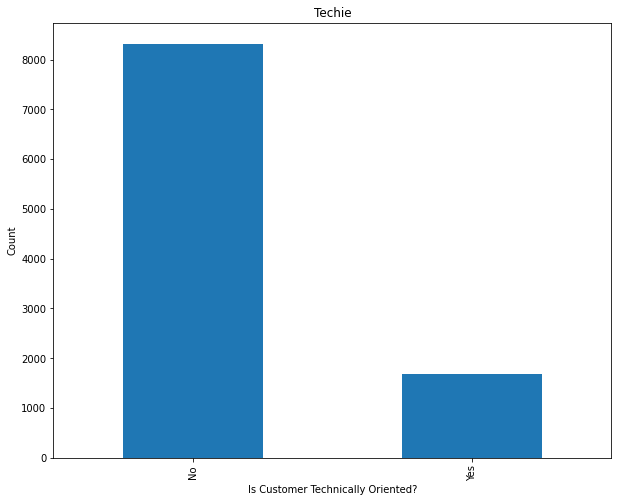

In [319]:
plt.figure(figsize=(10,8))
df_viz['Techie'].value_counts().plot(kind='bar')
plt.title('Techie')
plt.xlabel('Is Customer Technically Oriented?')
plt.ylabel('Count')
plt.show()

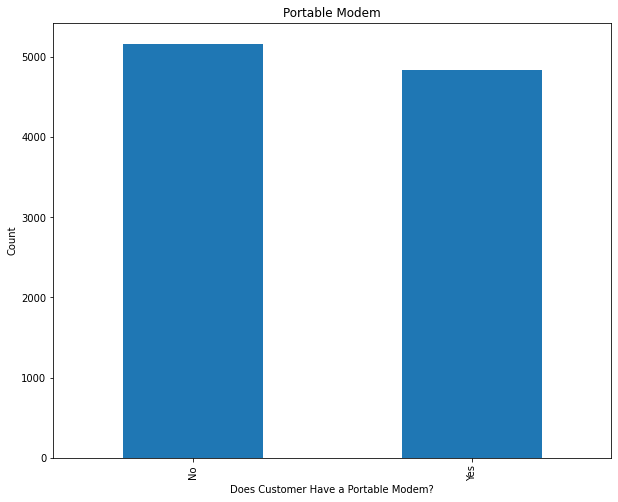

In [320]:
plt.figure(figsize=(10,8))
df_viz['Port_modem'].value_counts().plot(kind='bar')
plt.title('Portable Modem')
plt.xlabel('Does Customer Have a Portable Modem?')
plt.ylabel('Count')
plt.show()

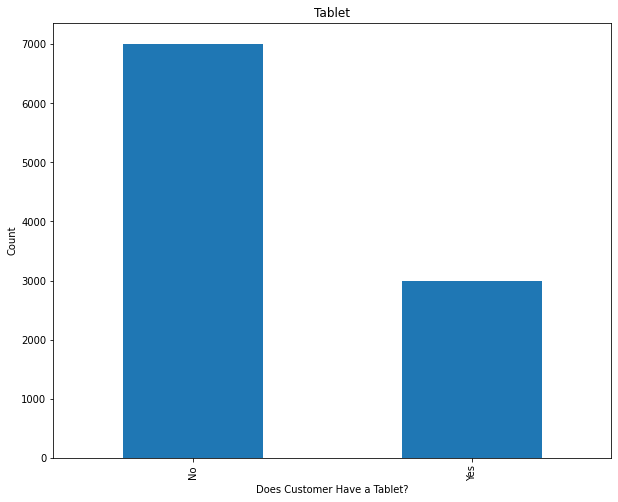

In [321]:
plt.figure(figsize=(10,8))
df_viz['Tablet'].value_counts().plot(kind='bar')
plt.title('Tablet')
plt.xlabel('Does Customer Have a Tablet?')
plt.ylabel('Count')
plt.show()

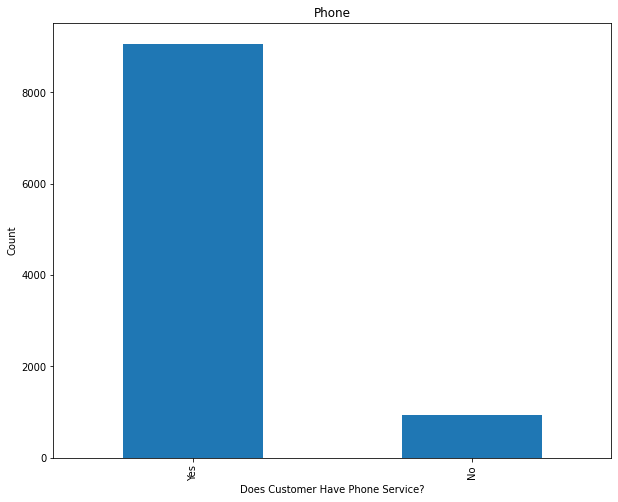

In [322]:
plt.figure(figsize=(10,8))
df_viz['Phone'].value_counts().plot(kind='bar')
plt.title('Phone')
plt.xlabel('Does Customer Have Phone Service?')
plt.ylabel('Count')
plt.show()

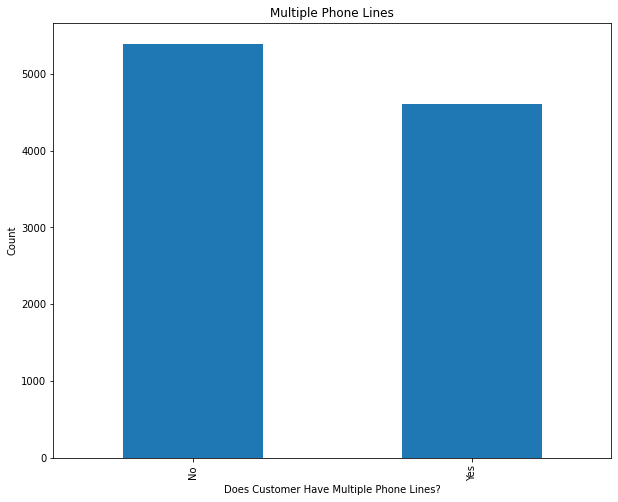

In [323]:
plt.figure(figsize=(10,8))
df_viz['Multiple'].value_counts().plot(kind='bar')
plt.title('Multiple Phone Lines')
plt.xlabel('Does Customer Have Multiple Phone Lines?')
plt.ylabel('Count')
plt.show()

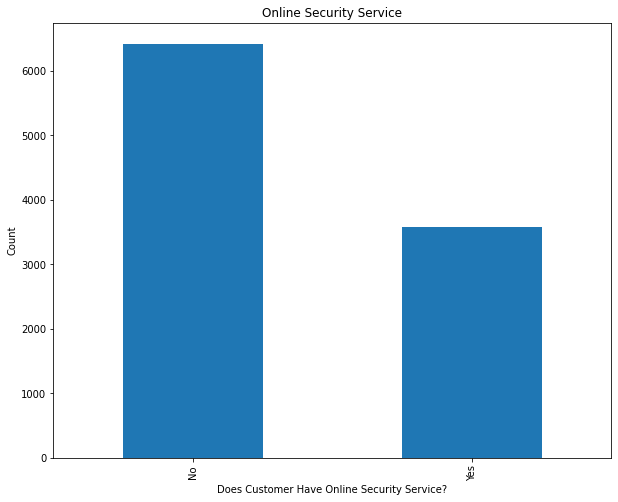

In [324]:
plt.figure(figsize=(10,8))
df_viz['OnlineSecurity'].value_counts().plot(kind='bar')
plt.title('Online Security Service')
plt.xlabel('Does Customer Have Online Security Service?')
plt.ylabel('Count')
plt.show()

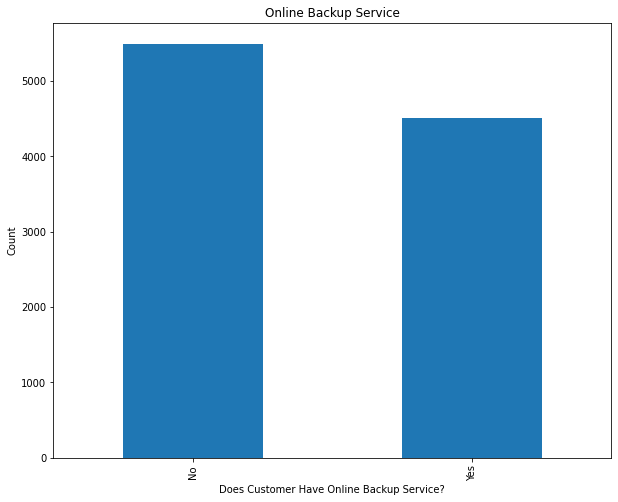

In [325]:
plt.figure(figsize=(10,8))
df_viz['OnlineBackup'].value_counts().plot(kind='bar')
plt.title('Online Backup Service')
plt.xlabel('Does Customer Have Online Backup Service?')
plt.ylabel('Count')
plt.show()

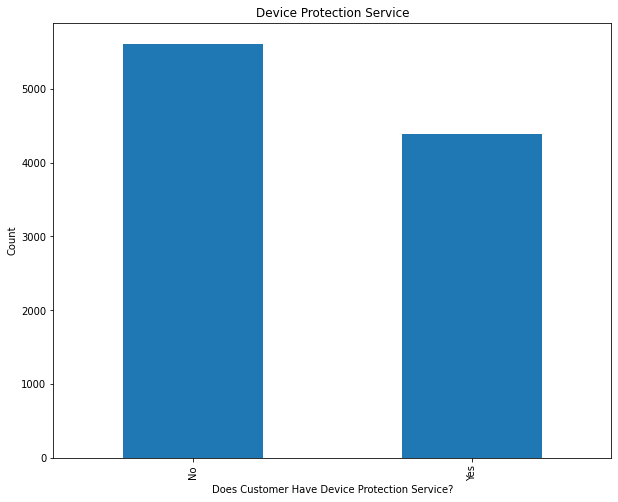

In [326]:
plt.figure(figsize=(10,8))
df_viz['DeviceProtection'].value_counts().plot(kind='bar')
plt.title('Device Protection Service')
plt.xlabel('Does Customer Have Device Protection Service?')
plt.ylabel('Count')
plt.show()

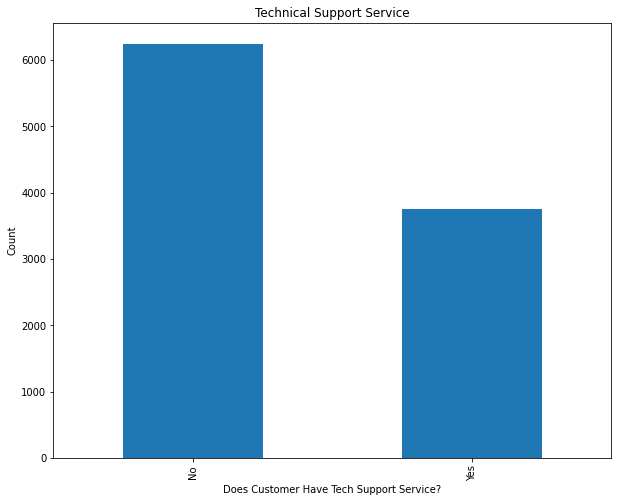

In [327]:
plt.figure(figsize=(10,8))
df_viz['TechSupport'].value_counts().plot(kind='bar')
plt.title('Technical Support Service')
plt.xlabel('Does Customer Have Tech Support Service?')
plt.ylabel('Count')
plt.show()

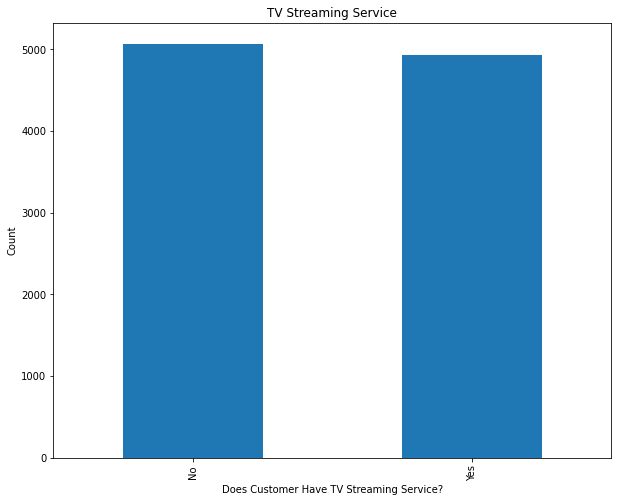

In [328]:
plt.figure(figsize=(10,8))
df_viz['StreamingTV'].value_counts().plot(kind='bar')
plt.title('TV Streaming Service')
plt.xlabel('Does Customer Have TV Streaming Service?')
plt.ylabel('Count')
plt.show()

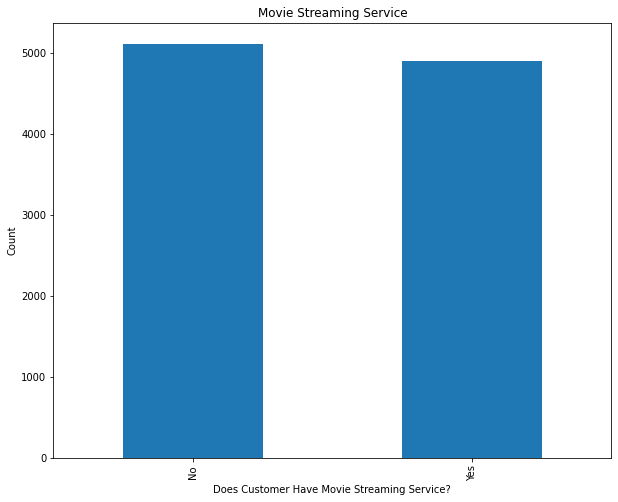

In [329]:
plt.figure(figsize=(10,8))
df_viz['StreamingMovies'].value_counts().plot(kind='bar')
plt.title('Movie Streaming Service')
plt.xlabel('Does Customer Have Movie Streaming Service?')
plt.ylabel('Count')
plt.show()

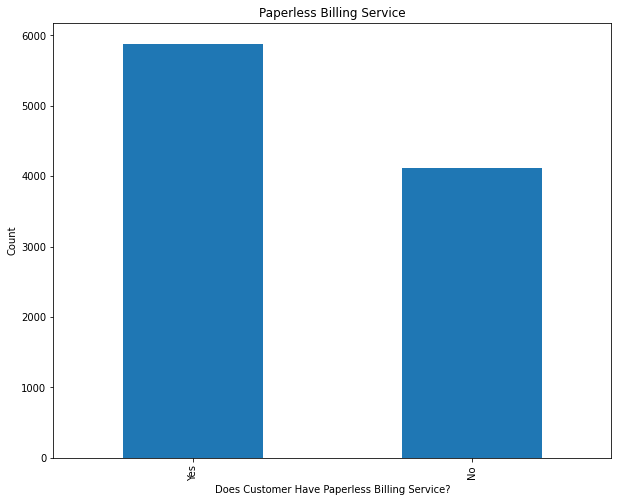

In [330]:
plt.figure(figsize=(10,8))
df_viz['PaperlessBilling'].value_counts().plot(kind='bar')
plt.title('Paperless Billing Service')
plt.xlabel('Does Customer Have Paperless Billing Service?')
plt.ylabel('Count')
plt.show()

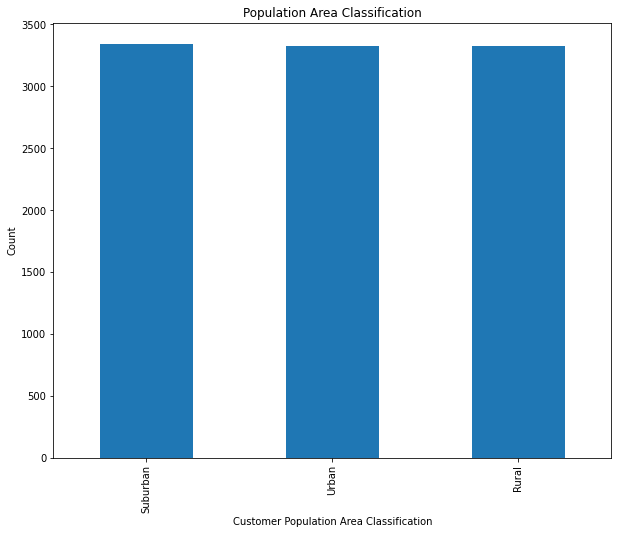

In [331]:
plt.figure(figsize=(10,8))
df_viz['Area'].value_counts().plot(kind='bar')
plt.title('Population Area Classification')
plt.xlabel('Customer Population Area Classification')
plt.ylabel('Count')
plt.show()

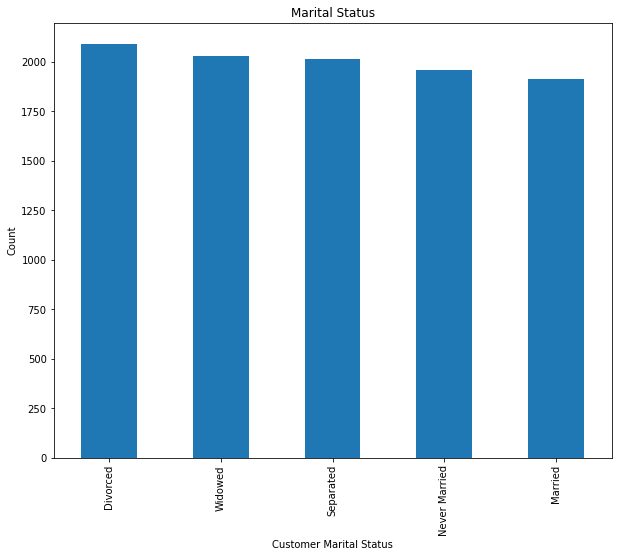

In [332]:
plt.figure(figsize=(10,8))
df_viz['Marital'].value_counts().plot(kind='bar')
plt.title('Marital Status')
plt.xlabel('Customer Marital Status')
plt.ylabel('Count')
plt.show()

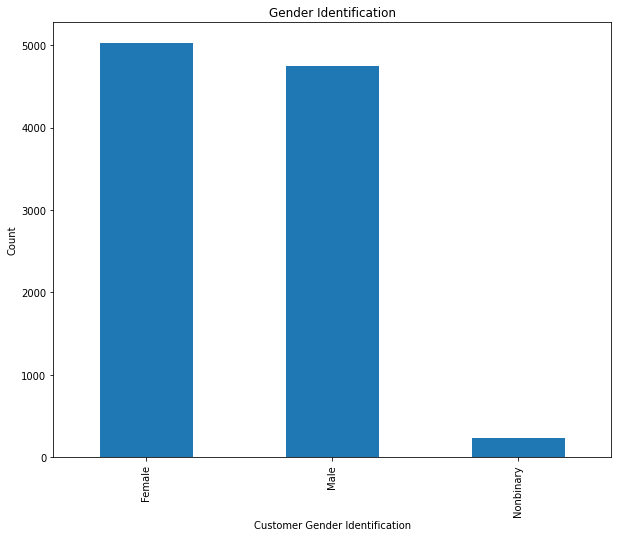

In [333]:
plt.figure(figsize=(10,8))
df_viz['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Identification')
plt.xlabel('Customer Gender Identification')
plt.ylabel('Count')
plt.show()

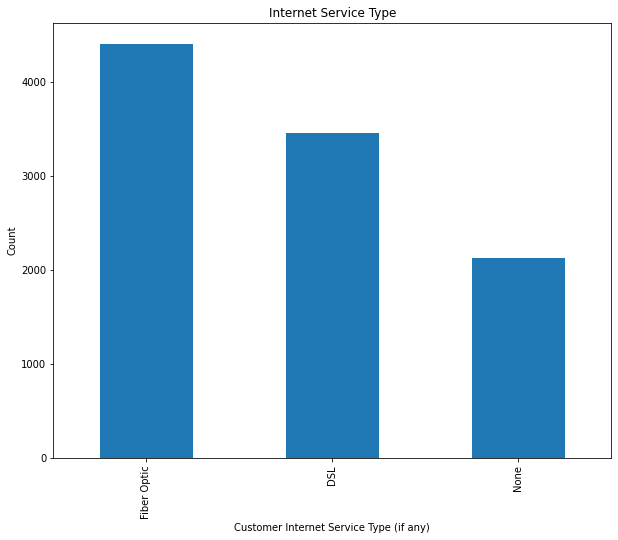

In [334]:
plt.figure(figsize=(10,8))
df_viz['InternetService'].value_counts().plot(kind='bar')
plt.title('Internet Service Type')
plt.xlabel('Customer Internet Service Type (if any)')
plt.ylabel('Count')
plt.show()

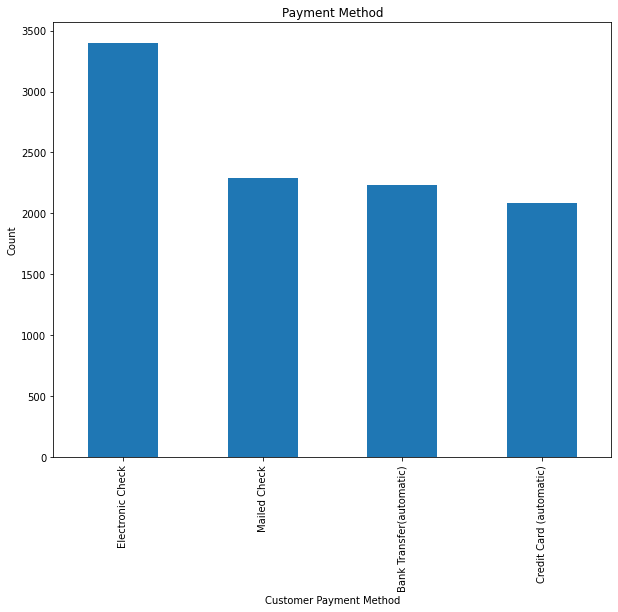

In [335]:
plt.figure(figsize=(10,8))
df_viz['PaymentMethod'].value_counts().plot(kind='bar')
plt.title('Payment Method')
plt.xlabel('Customer Payment Method')
plt.ylabel('Count')
plt.show()

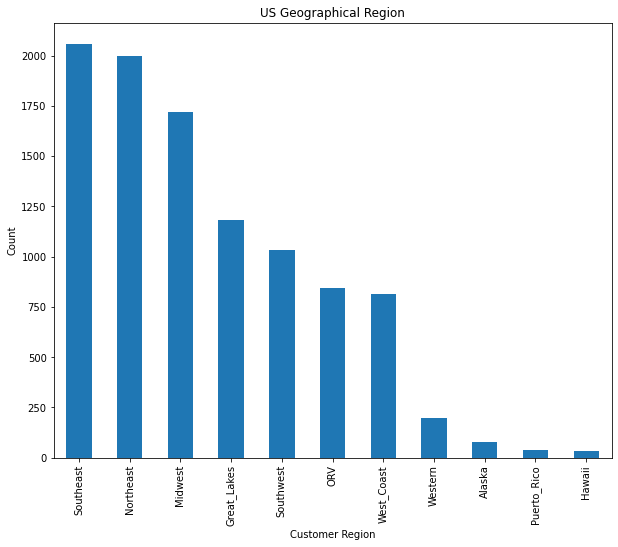

In [336]:
plt.figure(figsize=(10,8))
df_viz['Region'].value_counts().plot(kind='bar')
plt.title('US Geographical Region')
plt.xlabel('Customer Region')
plt.ylabel('Count')
plt.show()

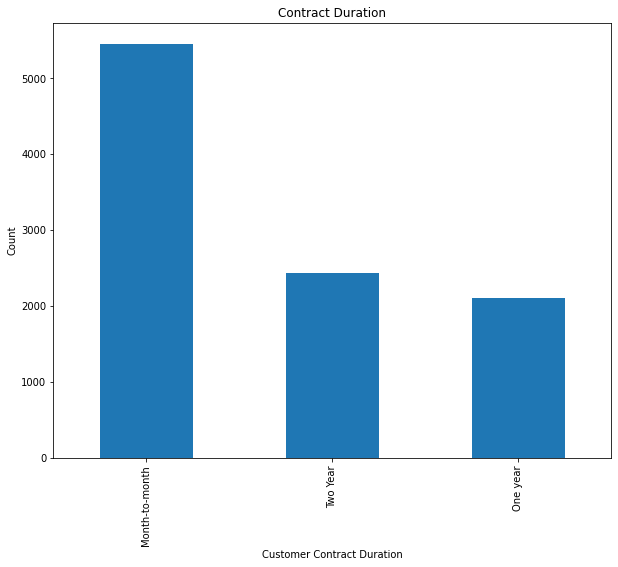

In [337]:
plt.figure(figsize=(10,8))
df_viz['Contract'].value_counts().plot(kind='bar')
plt.title('Contract Duration')
plt.xlabel('Customer Contract Duration')
plt.ylabel('Count')
plt.show()

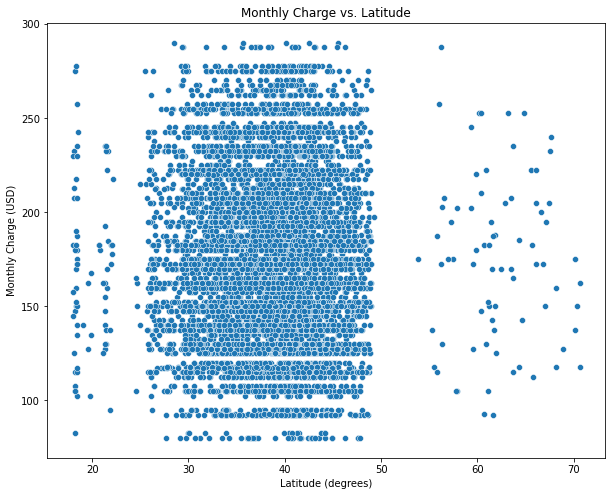

In [338]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Lat', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Latitude')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

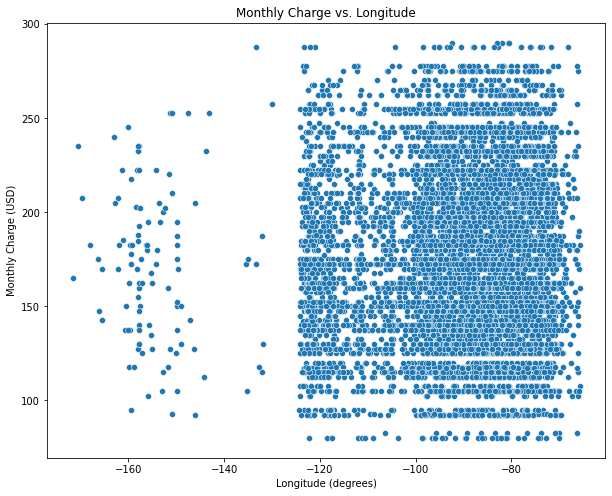

In [339]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Lng', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Longitude')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

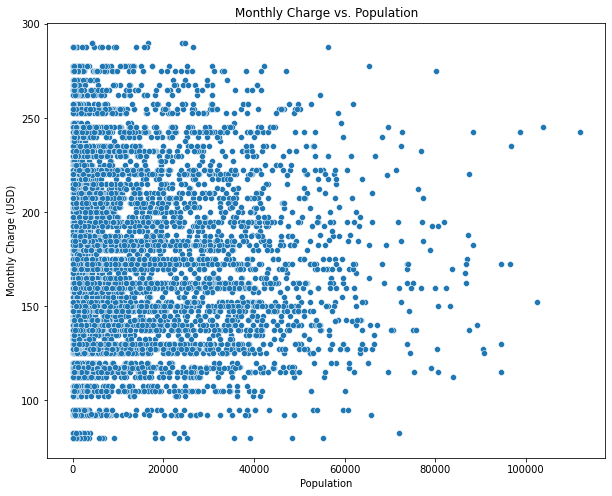

In [340]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Population', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Population')
plt.xlabel('Population')
plt.ylabel('Monthly Charge (USD)')
plt.show()

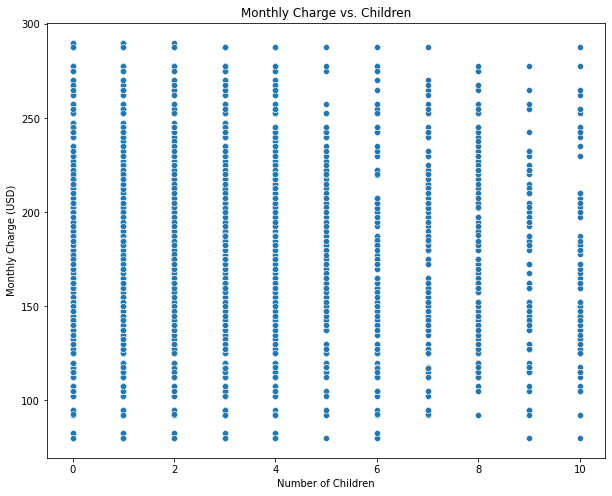

In [341]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Children', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Children')
plt.xlabel('Number of Children')
plt.ylabel('Monthly Charge (USD)')
plt.show()

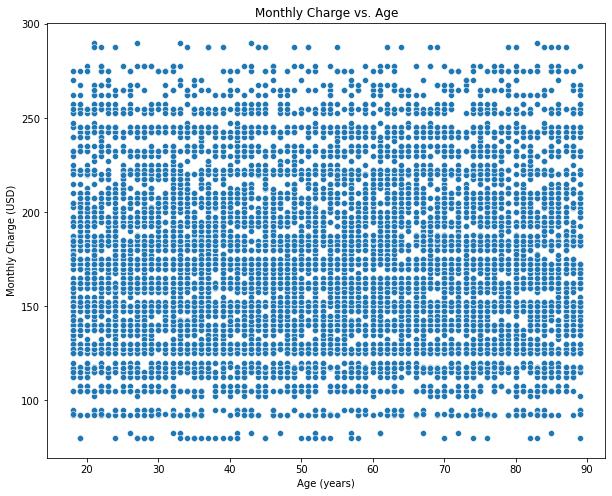

In [342]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Age')
plt.ylabel('Monthly Charge (USD)')
plt.xlabel('Age (years)')
plt.show()

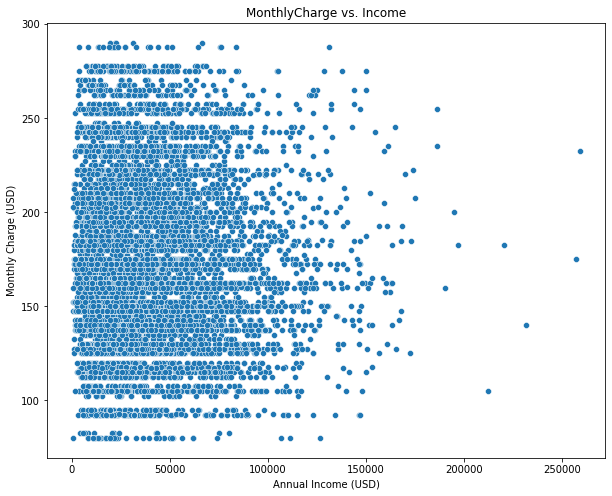

In [343]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income', y='MonthlyCharge', data=df_viz)
plt.title('MonthlyCharge vs. Income')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

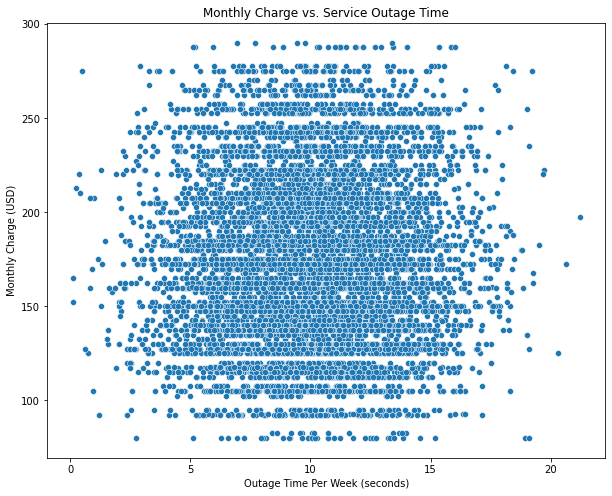

In [344]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Outage_sec_perweek', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Service Outage Time')
plt.xlabel('Outage Time Per Week (seconds)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

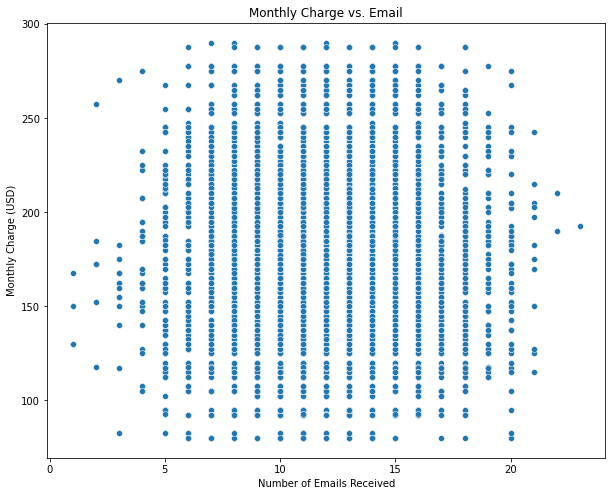

In [345]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Email', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Email')
plt.xlabel('Number of Emails Received')
plt.ylabel('Monthly Charge (USD)')
plt.show()

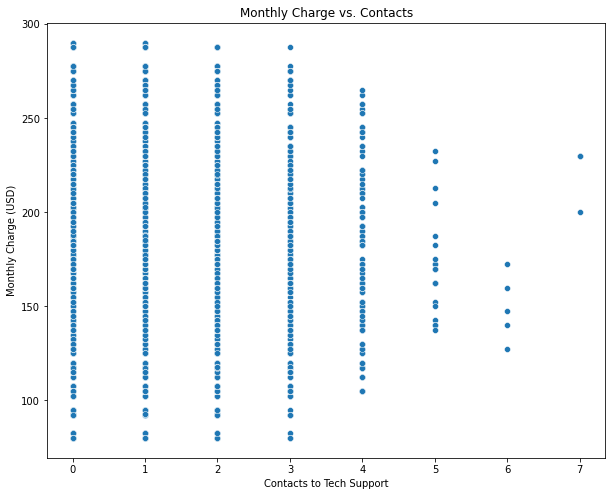

In [346]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Contacts', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Contacts')
plt.xlabel('Contacts to Tech Support')
plt.ylabel('Monthly Charge (USD)')
plt.show()

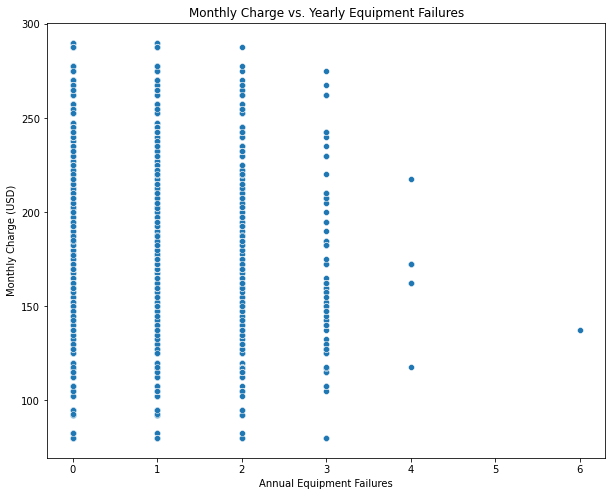

In [347]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Yearly_equip_failure', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Yearly Equipment Failures')
plt.xlabel('Annual Equipment Failures')
plt.ylabel('Monthly Charge (USD)')
plt.show()

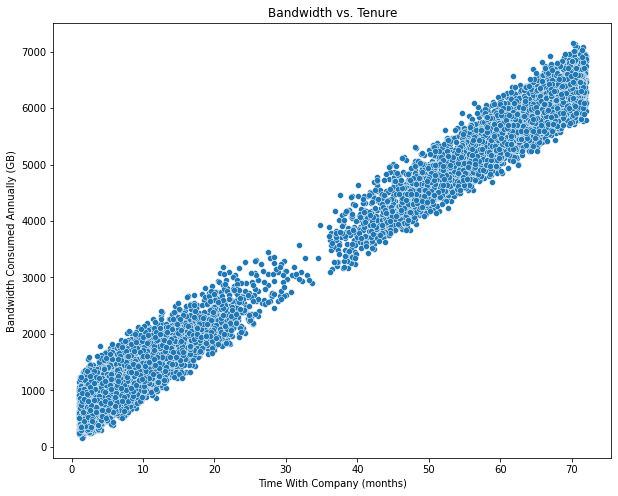

In [348]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Tenure', y='Bandwidth_GB_Year', data=df_viz)
plt.title('Bandwidth vs. Tenure')
plt.xlabel('Time With Company (months)')
plt.ylabel('Bandwidth Consumed Annually (GB)')
plt.show()

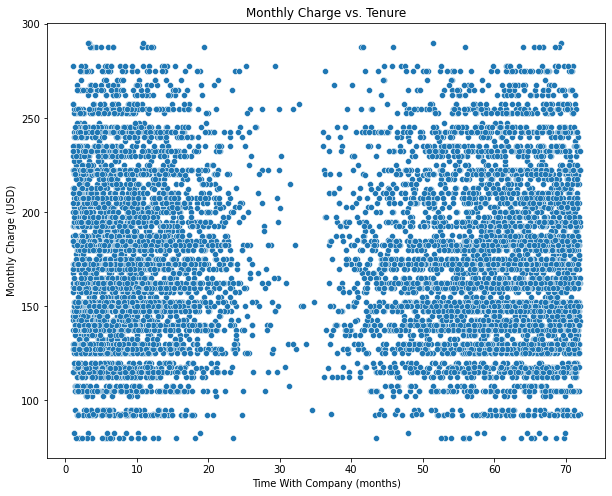

In [349]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Tenure', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Tenure')
plt.xlabel('Time With Company (months)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

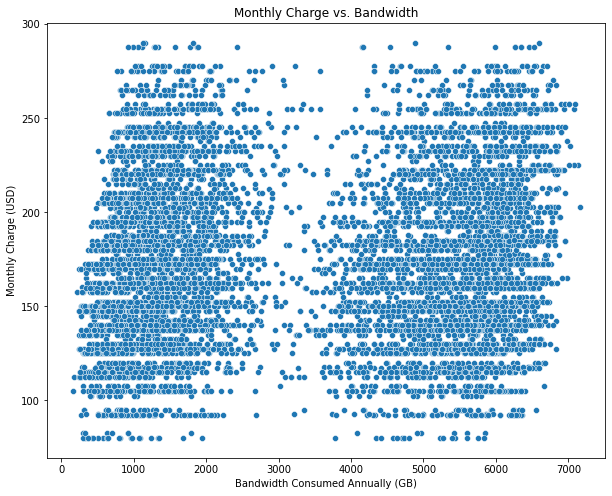

In [350]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Bandwidth_GB_Year', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Bandwidth')
plt.xlabel('Bandwidth Consumed Annually (GB)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

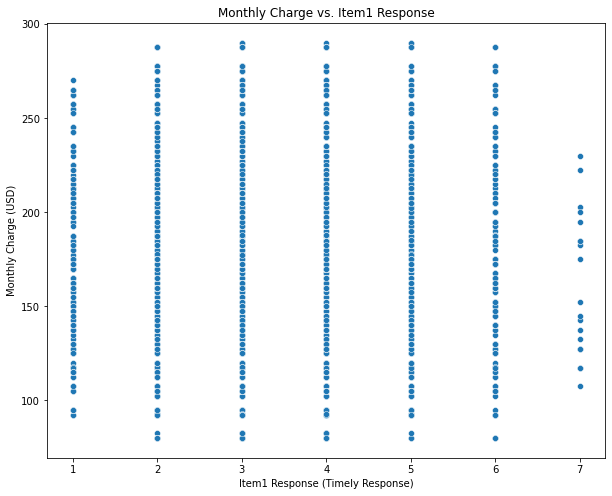

In [351]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item1', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item1 Response')
plt.xlabel('Item1 Response (Timely Response)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

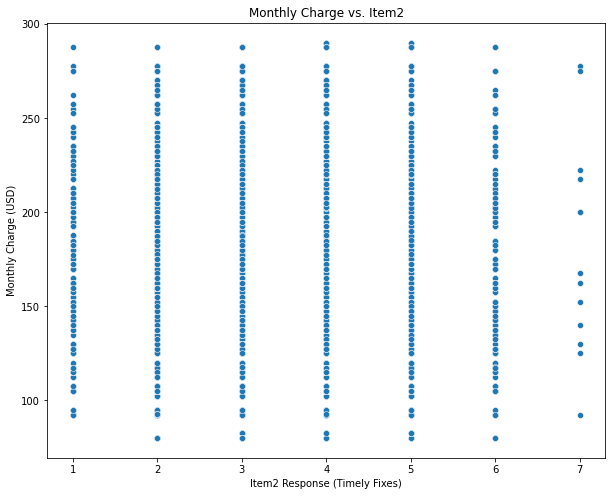

In [352]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item2', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item2')
plt.xlabel('Item2 Response (Timely Fixes)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

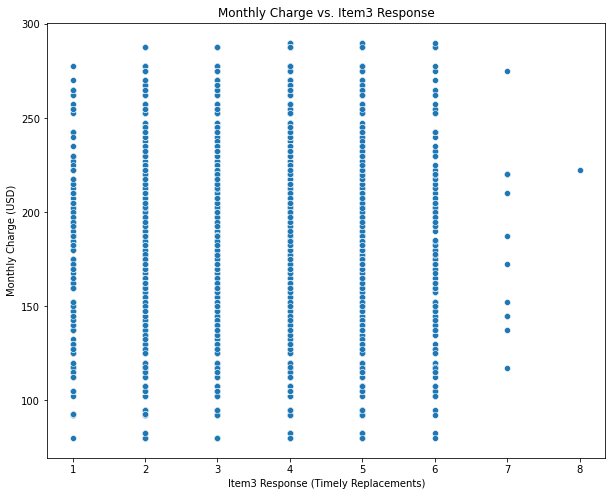

In [353]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item3', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item3 Response')
plt.xlabel('Item3 Response (Timely Replacements)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

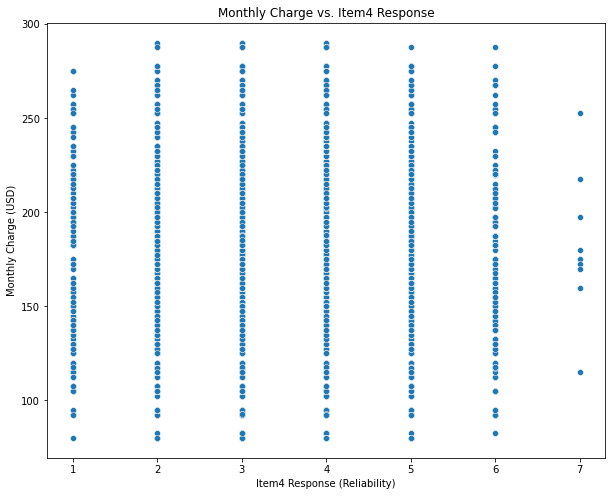

In [354]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item4', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item4 Response')
plt.xlabel('Item4 Response (Reliability)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

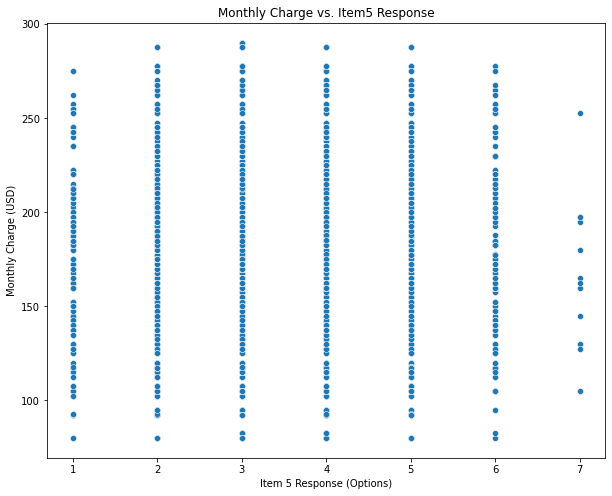

In [355]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item5', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item5 Response')
plt.xlabel('Item 5 Response (Options)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

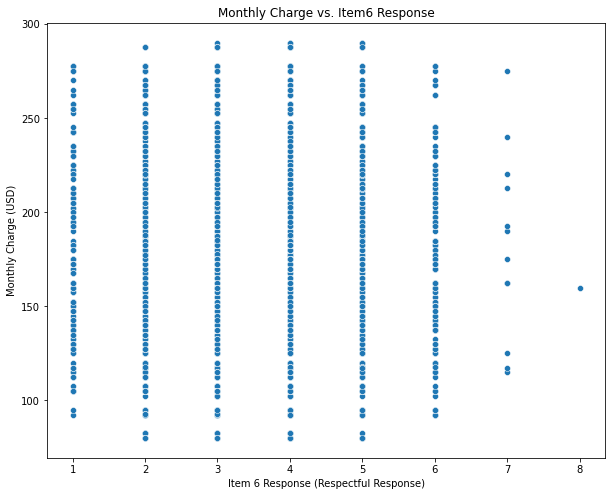

In [356]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item6', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item6 Response')
plt.xlabel('Item 6 Response (Respectful Response)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

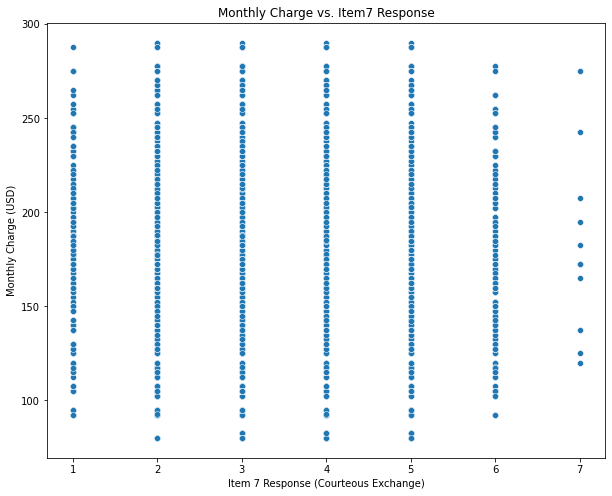

In [357]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item7', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item7 Response')
plt.xlabel('Item 7 Response (Courteous Exchange)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

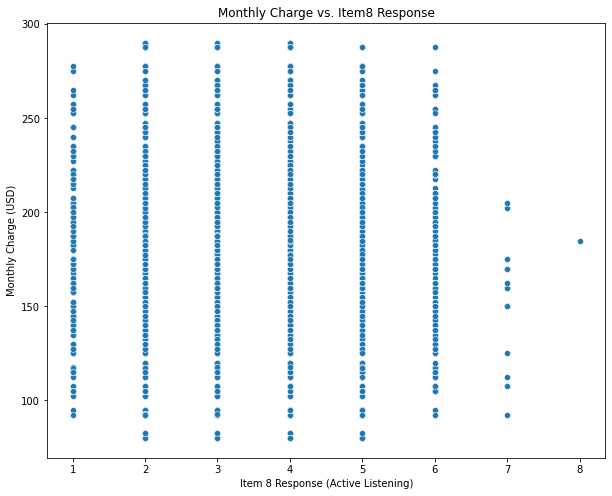

In [358]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item8', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Item8 Response')
plt.xlabel('Item 8 Response (Active Listening)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

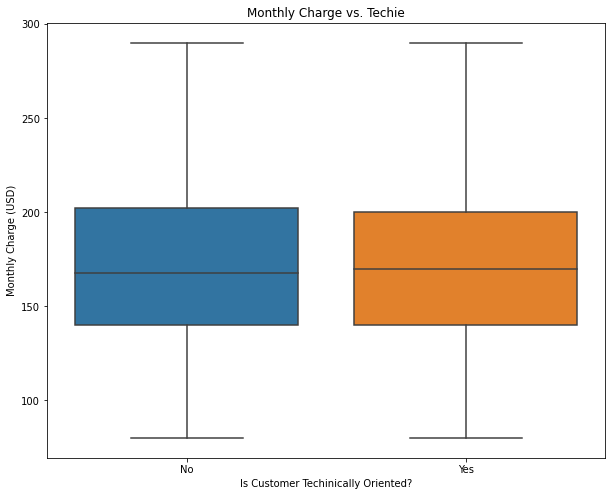

In [359]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Techie', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Techie')
plt.xlabel('Is Customer Techinically Oriented?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

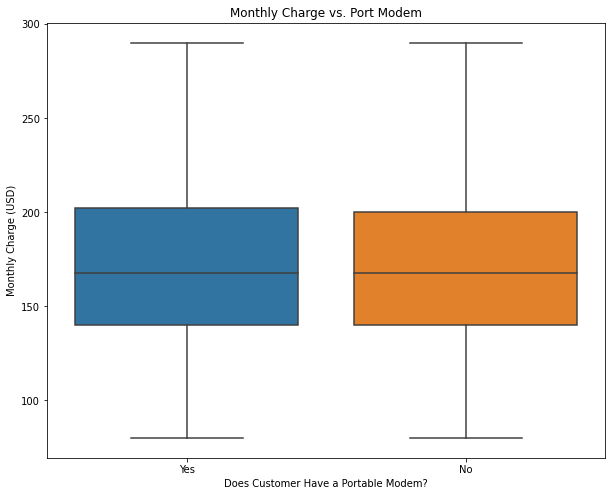

In [360]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Port_modem', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Port Modem')
plt.xlabel('Does Customer Have a Portable Modem?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

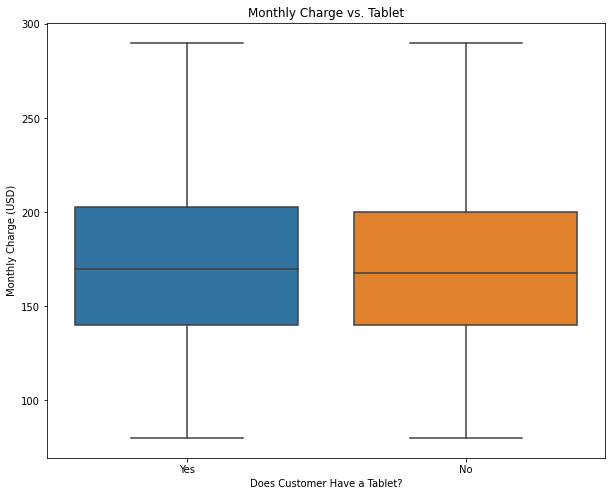

In [361]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Tablet', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Tablet')
plt.xlabel('Does Customer Have a Tablet?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

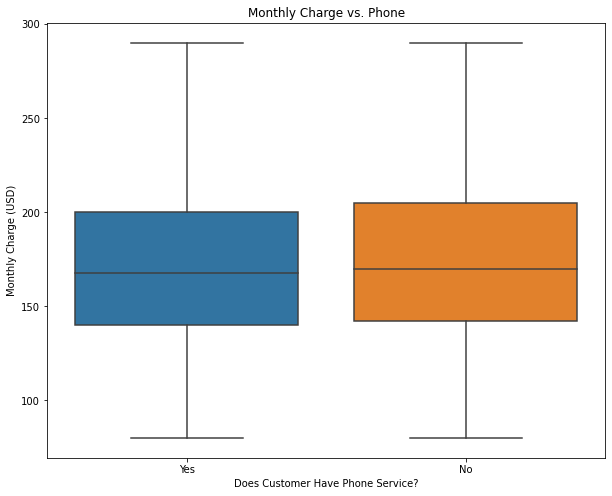

In [362]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Phone', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Phone')
plt.xlabel('Does Customer Have Phone Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

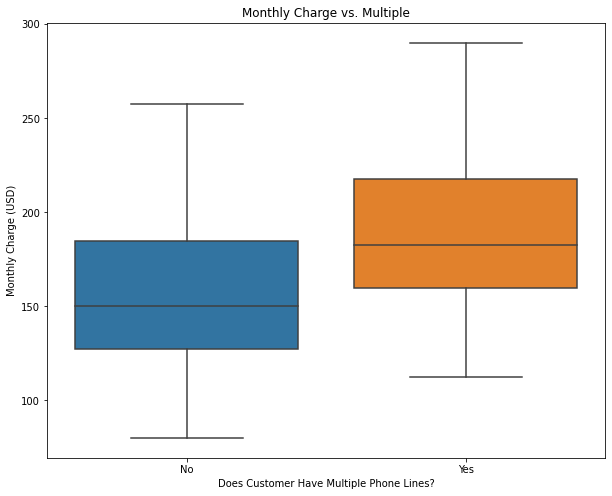

In [363]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Multiple', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Multiple')
plt.xlabel('Does Customer Have Multiple Phone Lines?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

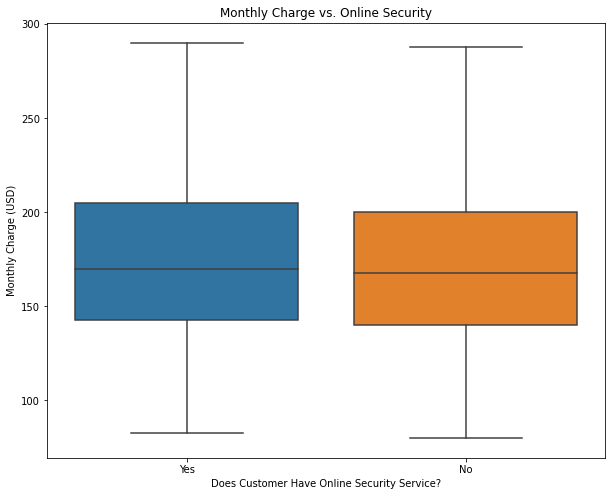

In [364]:
plt.figure(figsize=(10,8))
sns.boxplot(x='OnlineSecurity', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Online Security')
plt.xlabel('Does Customer Have Online Security Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

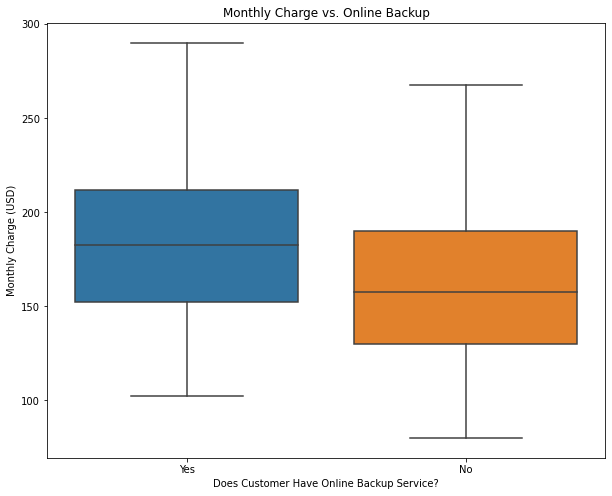

In [365]:
plt.figure(figsize=(10,8))
sns.boxplot(x='OnlineBackup', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Online Backup')
plt.xlabel('Does Customer Have Online Backup Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

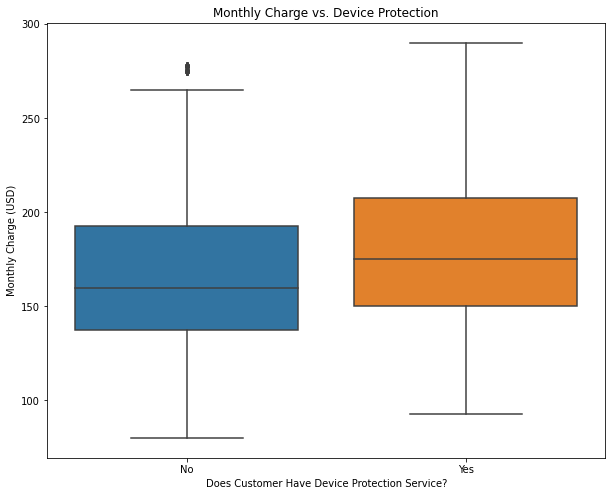

In [366]:
plt.figure(figsize=(10,8))
sns.boxplot(x='DeviceProtection', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Device Protection')
plt.xlabel('Does Customer Have Device Protection Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

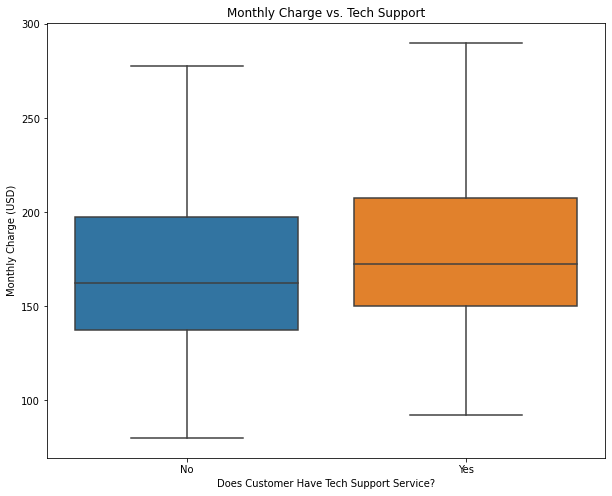

In [367]:
plt.figure(figsize=(10,8))
sns.boxplot(x='TechSupport', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Tech Support')
plt.xlabel('Does Customer Have Tech Support Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

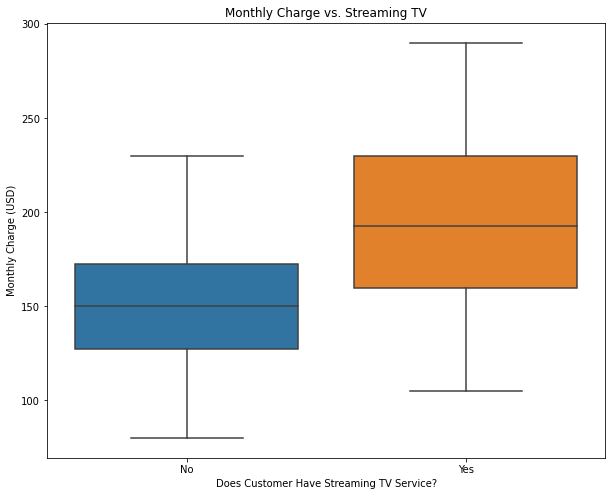

In [368]:
plt.figure(figsize=(10,8))
sns.boxplot(x='StreamingTV', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Streaming TV')
plt.xlabel('Does Customer Have Streaming TV Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

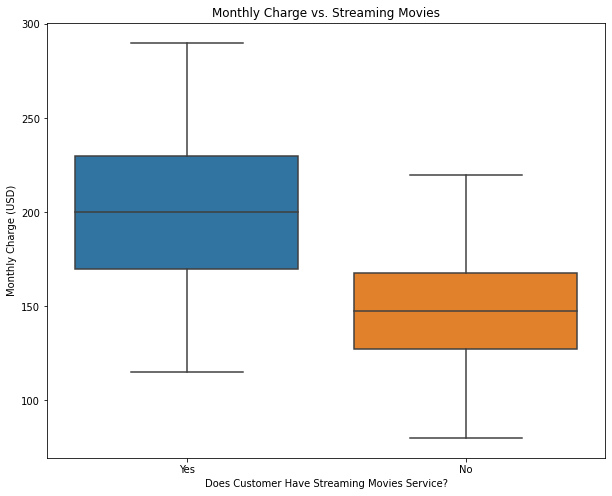

In [369]:
plt.figure(figsize=(10,8))
sns.boxplot(x='StreamingMovies', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Streaming Movies')
plt.xlabel('Does Customer Have Streaming Movies Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

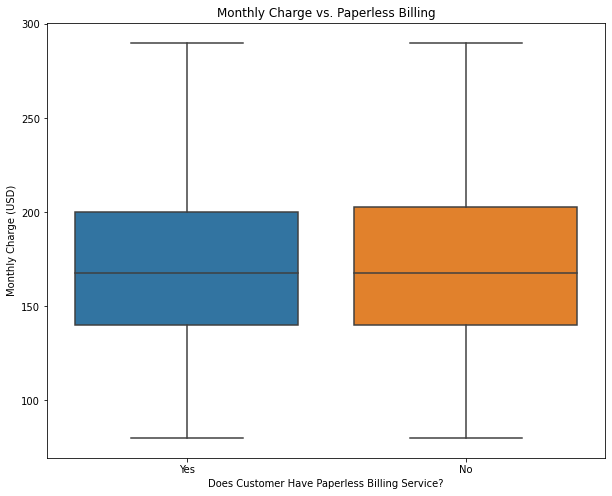

In [370]:
plt.figure(figsize=(10,8))
sns.boxplot(x='PaperlessBilling', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Paperless Billing')
plt.xlabel('Does Customer Have Paperless Billing Service?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

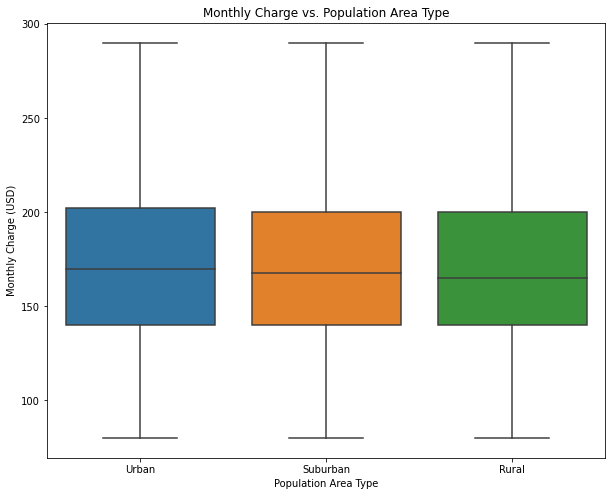

In [371]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Area', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Population Area Type')
plt.xlabel('Population Area Type')
plt.ylabel('Monthly Charge (USD)')
plt.show()

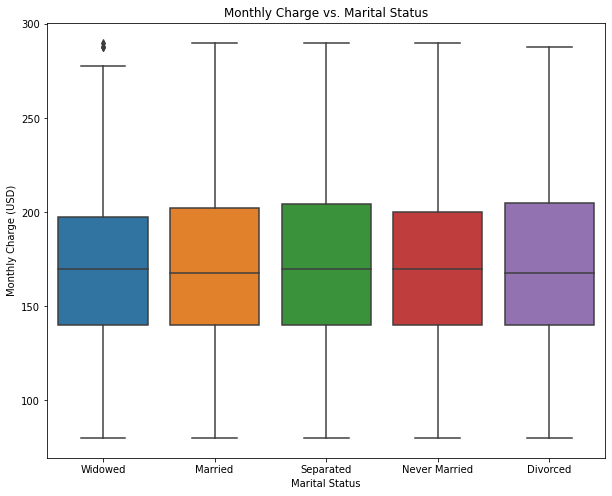

In [372]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Marital', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Monthly Charge (USD)')
plt.show()

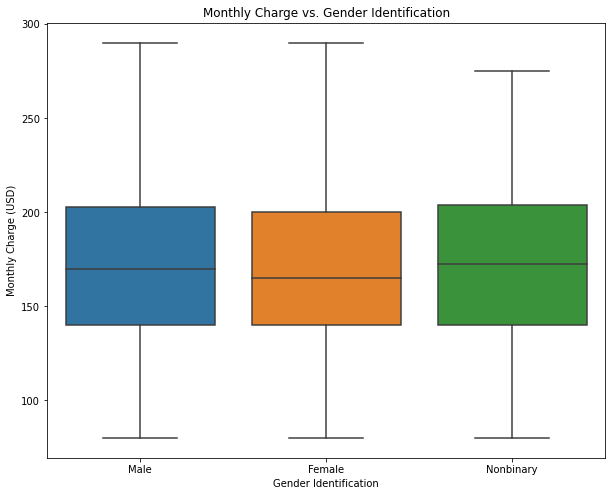

In [373]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Gender', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Gender Identification')
plt.xlabel('Gender Identification')
plt.ylabel('Monthly Charge (USD)')
plt.show()

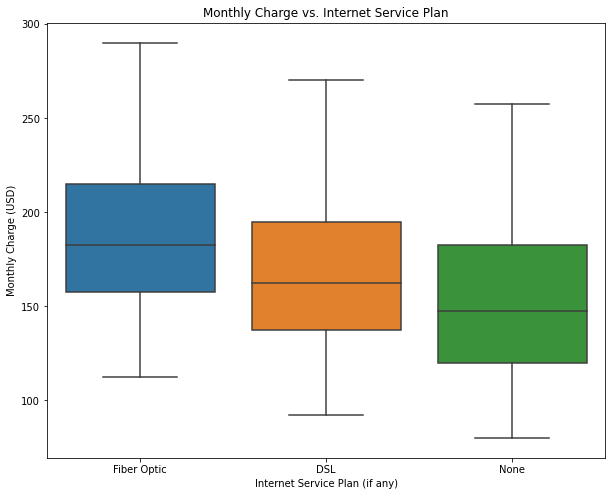

In [374]:
plt.figure(figsize=(10,8))
sns.boxplot(x='InternetService', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Internet Service Plan')
plt.xlabel('Internet Service Plan (if any)')
plt.ylabel('Monthly Charge (USD)')
plt.show()

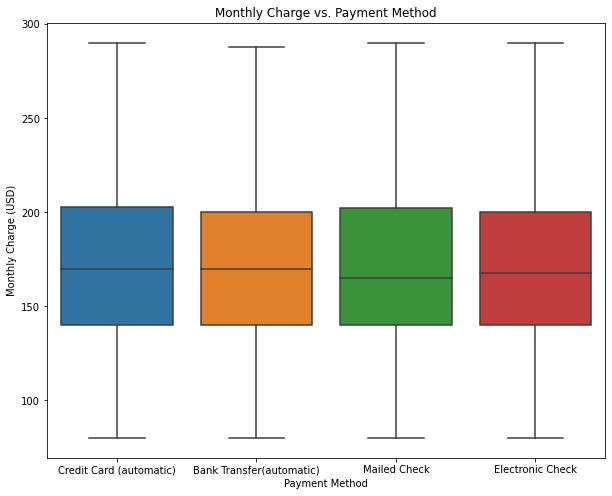

In [375]:
plt.figure(figsize=(10,8))
sns.boxplot(x='PaymentMethod', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charge (USD)')
plt.show()

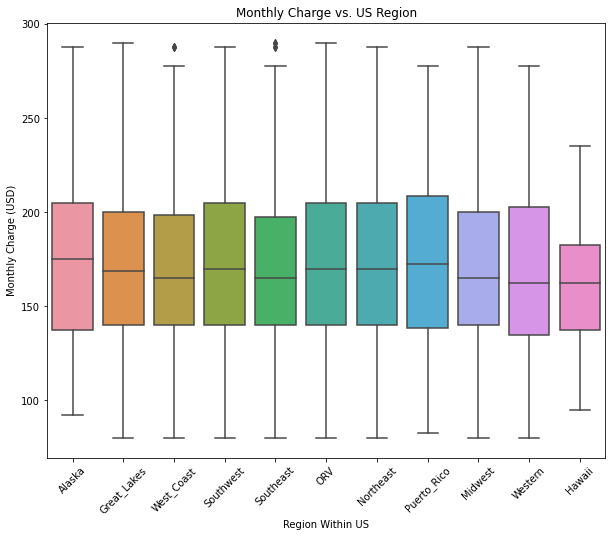

In [376]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Region', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. US Region')
plt.xlabel('Region Within US')
plt.ylabel('Monthly Charge (USD)')
plt.xticks(rotation=45)
plt.show()

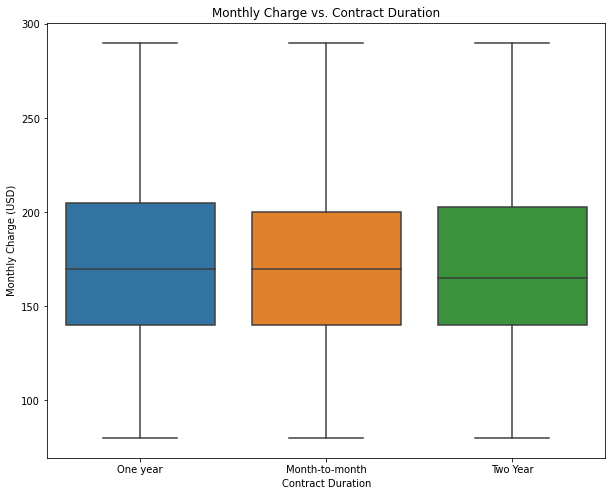

In [377]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Contract', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge vs. Contract Duration')
plt.xlabel('Contract Duration')
plt.ylabel('Monthly Charge (USD)')
plt.show()

In [378]:
#df_final_round1.head()

In [379]:
#df_final_round1.columns

In [380]:
#df_final_round2.head()

In [381]:
#df_final_round2.columns

In [382]:
#df_final_round1.to_csv('initial_dataset_with_log_transforms.csv')

In [383]:
#df_final_round2.to_csv('initial_dataset_without_log_transforms.csv')